# Loan Default Prediction and Evaluation Criteria

## Importing the libraries

In [512]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [513]:
df = pd.read_csv('data/Dataset.csv')

## Data Exploration

In [514]:
# Display the summary information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [515]:
# Display the first few rows of the DataFrame
df.describe()

,ID,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Own_House_Age,Mobile_Tag,Homephone_Tag,Workphone_Working,Client_Family_Members,Cleint_City_Rating,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,41761.000000,121856.000000,121856.000000,121856.000000,119446.000000,119447.000000,119428.000000,118193.000000,53021.000000,116170.000000,59928.000000,118192.000000,103316.000000,121856.000000
mean,1.216093e+07,0.342854,0.332262,0.499175,0.692060,0.417779,12.157324,0.999992,0.200499,0.281201,2.154329,2.030038,3.159736,12.063100,0.501213,0.518625,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,0.474665,0.471026,0.500001,0.461644,0.728802,12.056079,0.002865,0.400375,0.449587,0.912686,0.504407,1.759045,3.280695,0.211204,0.740248,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.014568,0.000005,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.333481,0.390164,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,0.000000,0.000000,0.000000,1.000000,0.000000,9.000000,1.000000,0.000000,0.000000,2.000000,2.000000,3.000000,12.000000,0.504657,0.564978,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,1.000000,0.000000,1.000000,3.000000,2.000000,5.000000,14.000000,0.673890,0.664011,0.148500,1570.000000,3.000000,0.000000
max,1.222186e+07,1.000000,1.000000,1.000000,1.000000,19.000000,69.000000,1.000000,1.000000,1.000000,16.000000,3.000000,6.000000,23.000000,0.945741,100.000000,1.000000,4185.000000,22.000000,1.000000


In [516]:
# Displaying summary statistics for all columns, including non-numeric ones
df.describe(include='all')

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
count,1.218560e+05,118249,118275.000000,118232.000000,118221.000000,118195.000000,118218.000000,118224.0,117044,120110,...,121856,121856,118247,53021.000000,116170.000000,94935.0000,59928.000000,118192.000000,103316.000000,121856.000000
unique,NaN,1516,NaN,NaN,NaN,NaN,NaN,6816.0,16680,7,...,2,2,58,NaN,NaN,1430.0000,NaN,NaN,NaN,NaN
top,NaN,13500,NaN,NaN,NaN,NaN,NaN,45000.0,900,Alone,...,Yes,Yes,Business Entity Type 3,NaN,NaN,0.7463,NaN,NaN,NaN,NaN
freq,NaN,11908,NaN,NaN,NaN,NaN,NaN,2513.0,1885,97409,...,112454,100015,26279,NaN,NaN,484.0000,NaN,NaN,NaN,NaN
mean,1.216093e+07,NaN,0.342854,0.332262,0.499175,0.692060,0.417779,NaN,NaN,NaN,...,NaN,NaN,NaN,0.501213,0.518625,NaN,0.117428,962.106056,1.891082,0.080792
std,3.517694e+04,NaN,0.474665,0.471026,0.500001,0.461644,0.728802,NaN,NaN,NaN,...,NaN,NaN,NaN,0.211204,0.740248,NaN,0.107974,827.976726,1.861921,0.272517
min,1.210000e+07,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.014568,0.000005,NaN,0.000000,0.000000,0.000000,0.000000
25%,1.213046e+07,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.333481,0.390164,NaN,0.057700,272.000000,0.000000,0.000000
50%,1.216093e+07,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.504657,0.564978,NaN,0.088700,755.000000,1.000000,0.000000
75%,1.219139e+07,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,0.673890,0.664011,NaN,0.148500,1570.000000,3.000000,0.000000


In [517]:
# Check for missing values
df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [518]:
# Checking the shape of the DataFrame
df.shape

(121856, 40)

In [519]:
# Checking first few rows of the DataFrame
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [520]:
# Checking the last few rows of the DataFrame
df.tail()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
121851,12207714,29250,0.0,0.0,NaN,1.0,0.0,107820,3165.3,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750,0.0,1.0,1.0,0.0,0.0,104256,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100,0.0,1.0,0.0,1.0,1.0,55107.9,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250,1.0,1.0,0.0,1.0,0.0,45000,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0
121855,12105610,9000,1.0,1.0,1.0,1.0,1.0,62428.95,4201.65,Alone,...,Yes,Yes,Business Entity Type 3,NaN,0.556414,0.298595,0.1031,805.0,0.0,0


In [521]:
# Checking the feature names in the DataFrame
df.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

In [522]:
# checking the null values in the DataFrame
df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [523]:
# checking the data types of each column
df.dtypes

ID                              int64
Client_Income                  object
Car_Owned                     float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                  object
Loan_Annuity                   object
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative     object
Age_Days                       object
Employed_Days                  object
Registration_Days              object
ID_Days                        object
Own_House_Age                 float64
Mobile_Tag                      int64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Famil

In [524]:
# Checking unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")

ID: 121856
Client_Income: 1516
Car_Owned: 2
Bike_Owned: 2
Active_Loan: 2
House_Own: 2
Child_Count: 14
Credit_Amount: 6816
Loan_Annuity: 16680
Accompany_Client: 7
Client_Income_Type: 8
Client_Education: 5
Client_Marital_Status: 4
Client_Gender: 3
Loan_Contract_Type: 2
Client_Housing_Type: 6
Population_Region_Relative: 164
Age_Days: 22583
Employed_Days: 13220
Registration_Days: 19254
ID_Days: 9655
Own_House_Age: 55
Mobile_Tag: 2
Homephone_Tag: 2
Workphone_Working: 2
Client_Occupation: 18
Client_Family_Members: 15
Cleint_City_Rating: 3
Application_Process_Day: 7
Application_Process_Hour: 24
Client_Permanent_Match_Tag: 2
Client_Contact_Work_Tag: 2
Type_Organization: 58
Score_Source_1: 43968
Score_Source_2: 67016
Score_Source_3: 1430
Social_Circle_Default: 1882
Phone_Change: 3590
Credit_Bureau: 21
Default: 2


In [525]:
# checking unique values in each column
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

ID: [12142509 12138936 12181264 ... 12103937 12170623 12105610]
Client_Income: ['6750' '20250' '18000' ... '13140' '9764.1' '12840.75']
Car_Owned: [ 0.  1. nan]
Bike_Owned: [ 0.  1. nan]
Active_Loan: [ 1.  0. nan]
House_Own: [ 0. nan  1.]
Child_Count: [ 0.  1.  2. nan  3.  4.  5.  7.  8. 10.  6. 19. 12. 14.  9.]
Credit_Amount: ['61190.55' '15282' '59527.35' ... '89138.7' '88885.8' '135534.6']
Loan_Annuity: ['3416.85' '1826.55' '2788.2' ... 1736.55 3388.05 2989.35]
Accompany_Client: ['Alone' 'Relative' 'Others' 'Kids' nan 'Partner' '##' 'Group']
Client_Income_Type: ['Commercial' 'Service' 'Retired' 'Govt Job' nan 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']
Client_Education: ['Secondary' 'Graduation' 'Graduation dropout' nan 'Junior secondary'
 'Post Grad']
Client_Marital_Status: ['M' 'W' 'S' nan 'D']
Client_Gender: ['Male' 'Female' nan 'XNA']
Loan_Contract_Type: ['CL' 'RL' nan]
Client_Housing_Type: ['Home' 'Family' 'Office' 'Municipal' nan 'Rental' 'Shared']
Population_Regi

In [526]:
# Merging all functions in the single temp Dataframe
def gen_temp_eda(df):
    temp = pd.DataFrame(index=df.columns)
    temp['null_values'] = df.isnull().sum()
    temp['unique_values'] = df.nunique()
    temp['data_types'] = df.dtypes
    return temp

gen_temp_eda(df)

,null_values,unique_values,data_types
ID,0,121856,int64
Client_Income,3607,1516,object
Car_Owned,3581,2,float64
Bike_Owned,3624,2,float64
Active_Loan,3635,2,float64
House_Own,3661,2,float64
Child_Count,3638,14,float64
Credit_Amount,3632,6816,object
Loan_Annuity,4812,16680,object
Accompany_Client,1746,7,object


In [527]:
# Column wise unique values
for col, unique_values in df.nunique().items():
    if unique_values < 15:
        print(f"'{col}' has {unique_values} unique values: {df[col].unique()}")


'Car_Owned' has 2 unique values: [ 0.  1. nan]
'Bike_Owned' has 2 unique values: [ 0.  1. nan]
'Active_Loan' has 2 unique values: [ 1.  0. nan]
'House_Own' has 2 unique values: [ 0. nan  1.]
'Child_Count' has 14 unique values: [ 0.  1.  2. nan  3.  4.  5.  7.  8. 10.  6. 19. 12. 14.  9.]
'Accompany_Client' has 7 unique values: ['Alone' 'Relative' 'Others' 'Kids' nan 'Partner' '##' 'Group']
'Client_Income_Type' has 8 unique values: ['Commercial' 'Service' 'Retired' 'Govt Job' nan 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']
'Client_Education' has 5 unique values: ['Secondary' 'Graduation' 'Graduation dropout' nan 'Junior secondary'
 'Post Grad']
'Client_Marital_Status' has 4 unique values: ['M' 'W' 'S' nan 'D']
'Client_Gender' has 3 unique values: ['Male' 'Female' nan 'XNA']
'Loan_Contract_Type' has 2 unique values: ['CL' 'RL' nan]
'Client_Housing_Type' has 6 unique values: ['Home' 'Family' 'Office' 'Municipal' nan 'Rental' 'Shared']
'Mobile_Tag' has 2 unique values: [1 0]
'

### Univariate analysis

Car_Owned
0.0    77724
1.0    40551
Name: count, dtype: int64


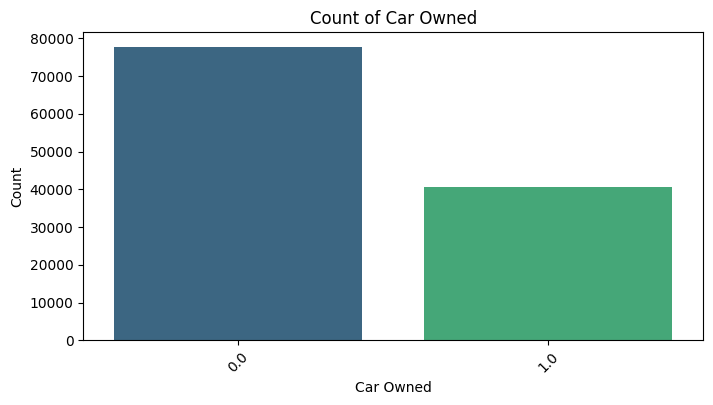

In [528]:
# Car_Owned column analysis
print(df['Car_Owned'].value_counts())

# graphical representation of the 'Car_Owned' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Car_Owned', data=df, palette='viridis')
plt.title('Count of Car Owned')
plt.xlabel('Car Owned')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Bike_Owned
0.0    78948
1.0    39284
Name: count, dtype: int64


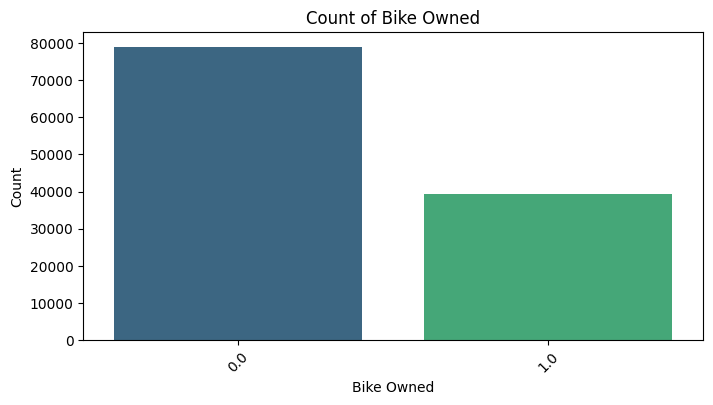

In [529]:
# Bike_Owned column analysis
print(df['Bike_Owned'].value_counts())
# graphical representation of the 'Bike_Owned' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Bike_Owned', data=df, palette='viridis')
plt.title('Count of Bike Owned')
plt.xlabel('Bike Owned')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

House_Own
1.0    81798
0.0    36397
Name: count, dtype: int64


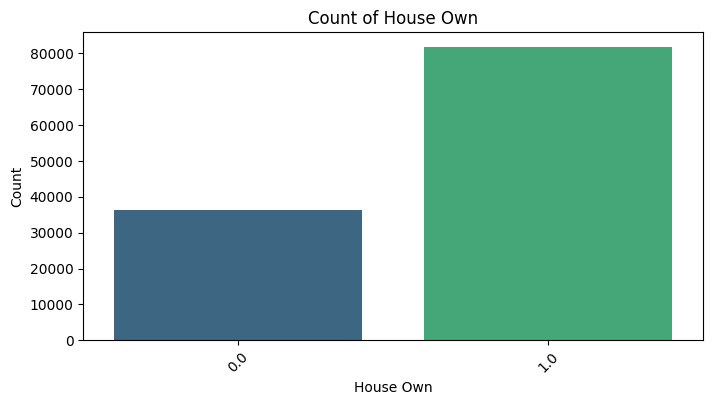

In [530]:
# House_Own column analysis
print(df['House_Own'].value_counts())

# graphical representation of the 'House_Own' column
plt.figure(figsize=(8, 4))
sns.countplot(x='House_Own', data=df, palette='viridis')
plt.title('Count of House Own')
plt.xlabel('House Own')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Child_Count
0.0     82834
1.0     23431
2.0     10294
3.0      1430
4.0       167
5.0        34
6.0        12
7.0         4
14.0        4
10.0        3
8.0         2
19.0        1
12.0        1
9.0         1
Name: count, dtype: int64


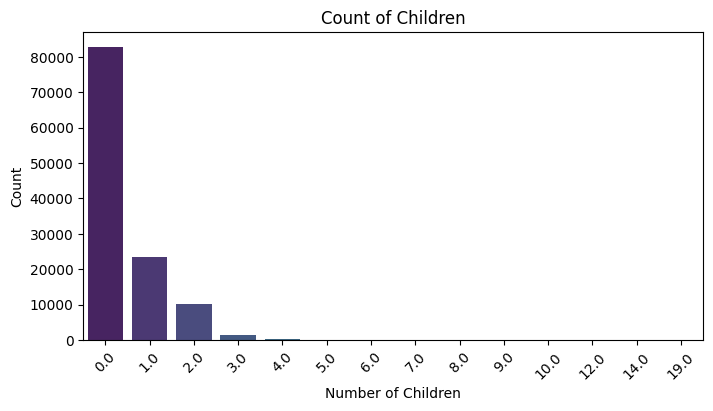

In [531]:
# Child_Count column analysis
print(df['Child_Count'].value_counts())

# graphical representation of the 'Child_Count' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Child_Count', data=df, palette='viridis')
plt.title('Count of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Accompany_Client
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: count, dtype: int64


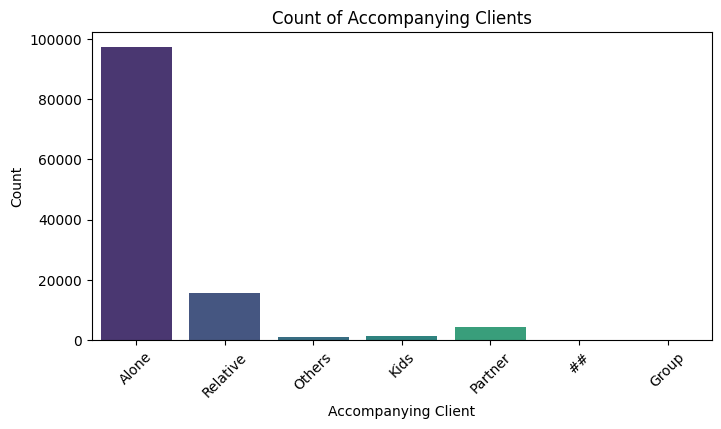

In [532]:
# Accompany_Client column analysis
print(df['Accompany_Client'].value_counts())

# graphical representation of the 'Accompany_Client' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Accompany_Client', data=df, palette='viridis')
plt.title('Count of Accompanying Clients')
plt.xlabel('Accompanying Client')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Client_Income_Type
Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: count, dtype: int64


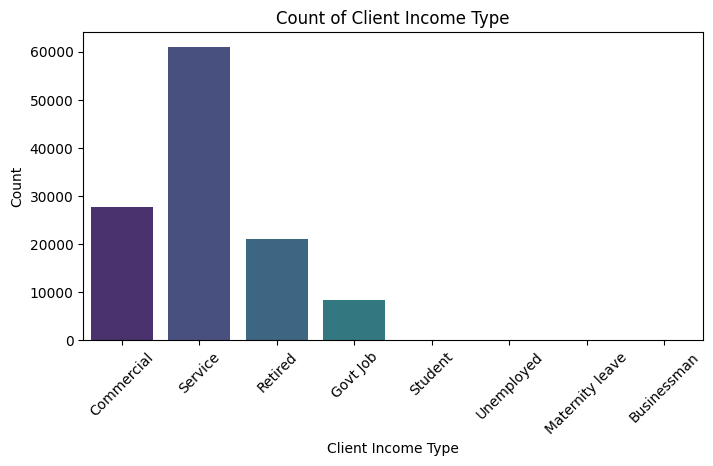

In [533]:
# Client_Income_Type column analysis
print(df['Client_Income_Type'].value_counts())
# graphical representation of the 'Client_Income_Type' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Client_Income_Type', data=df, palette='viridis')
plt.title('Count of Client Income Type')
plt.xlabel('Client Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Client_Education
Secondary             83911
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: count, dtype: int64


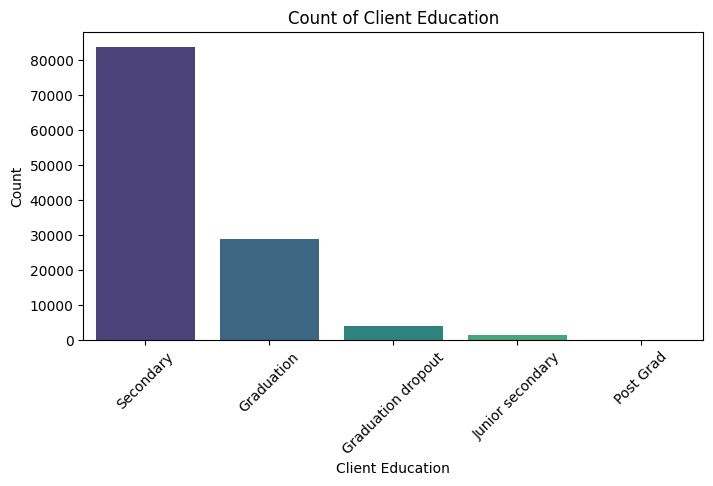

In [534]:
# Client_Education column analysis
print(df['Client_Education'].value_counts())
# graphical representation of the 'Client_Education' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Client_Education', data=df, palette='viridis')
plt.title('Count of Client Education')
plt.xlabel('Client Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Client_Marital_Status
M    87349
S    17404
D     7556
W     6074
Name: count, dtype: int64


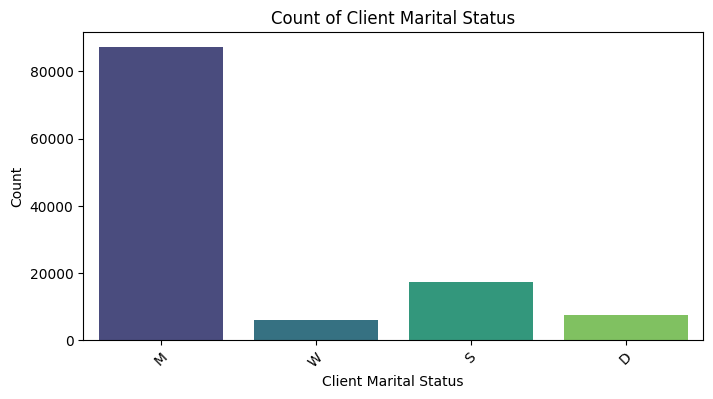

In [535]:
# Client_Marital_Status column analysis
print(df['Client_Marital_Status'].value_counts())
# graphical representation of the 'Client_Marital_Status' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Client_Marital_Status', data=df, palette='viridis')
plt.title('Count of Client Marital Status')
plt.xlabel('Client Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Client_Gender
Male      78463
Female    40977
XNA           3
Name: count, dtype: int64


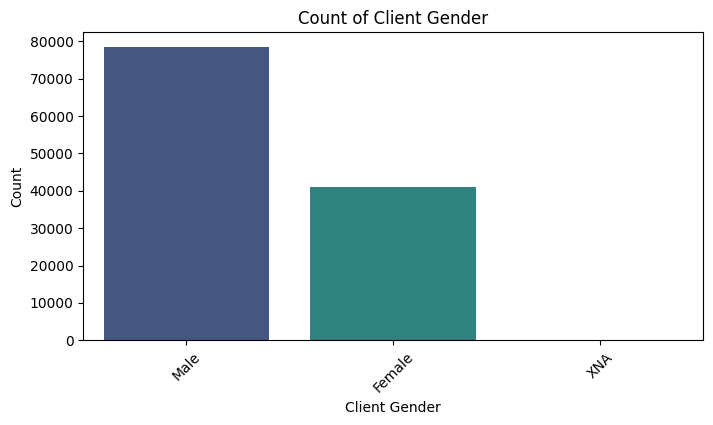

In [536]:
# Client_Gender column analysis
print(df['Client_Gender'].value_counts())
# graphical representation of the 'Client_Gender' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Client_Gender', data=df, palette='viridis')
plt.title('Count of Client Gender')
plt.xlabel('Client Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Loan_Contract_Type
CL    107118
RL     11087
Name: count, dtype: int64


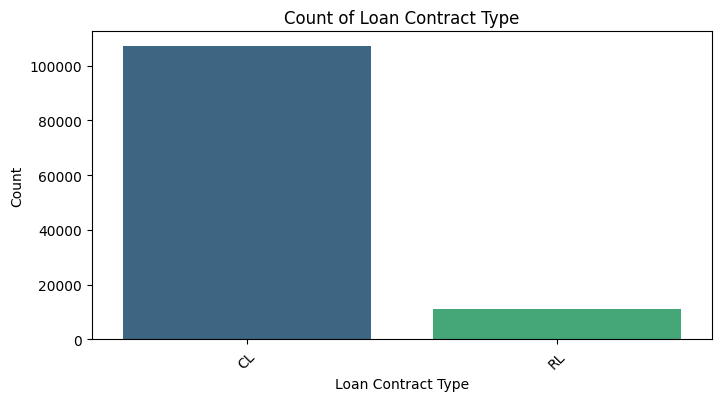

In [537]:
# Loan_Contract_Type column analysis
print(df['Loan_Contract_Type'].value_counts())
# graphical representation of the 'Loan_Contract_Type' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Loan_Contract_Type', data=df, palette='viridis')
plt.title('Count of Loan Contract Type')
plt.xlabel('Loan Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Client_Housing_Type
Home         104870
Family         5783
Municipal      4248
Rental         1816
Office         1002
Shared          450
Name: count, dtype: int64


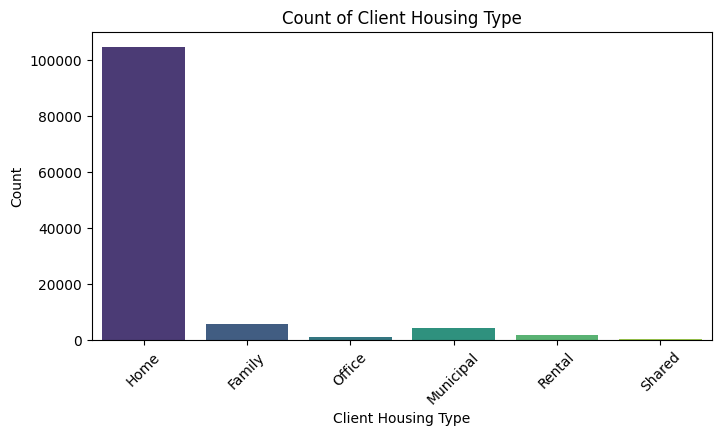

In [538]:
# Client_Housing_Type column analysis
print(df['Client_Housing_Type'].value_counts())
# graphical representation of the 'Client_Housing_Type' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Client_Housing_Type', data=df, palette='viridis')
plt.title('Count of Client Housing Type')
plt.xlabel('Client Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Mobile_Tag
1    121855
0         1
Name: count, dtype: int64


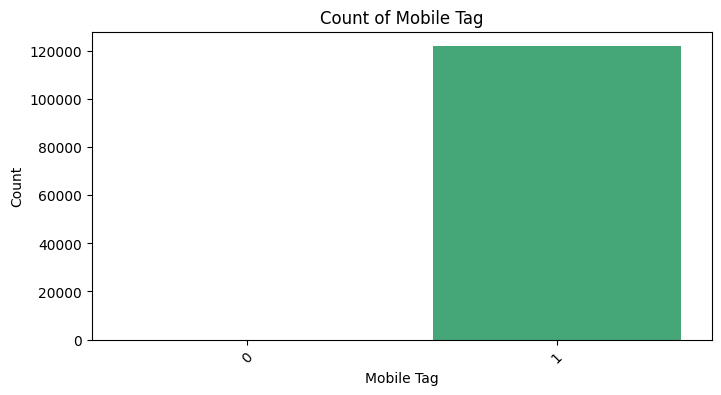

In [539]:
# Mobile_Tag column analysis
print(df['Mobile_Tag'].value_counts())
# graphical representation of the 'Mobile_Tag' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Mobile_Tag', data=df, palette='viridis')
plt.title('Count of Mobile Tag')
plt.xlabel('Mobile Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Homephone_Tag
0    97424
1    24432
Name: count, dtype: int64


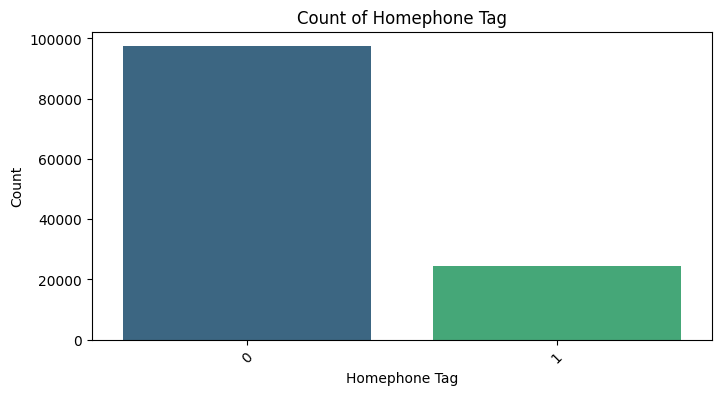

In [540]:
# Homephone_Tag column analysis
print(df['Homephone_Tag'].value_counts())
# graphical representation of the 'Homephone_Tag' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Homephone_Tag', data=df, palette='viridis')
plt.title('Count of Homephone Tag')
plt.xlabel('Homephone Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Workphone_Working
0    87590
1    34266
Name: count, dtype: int64


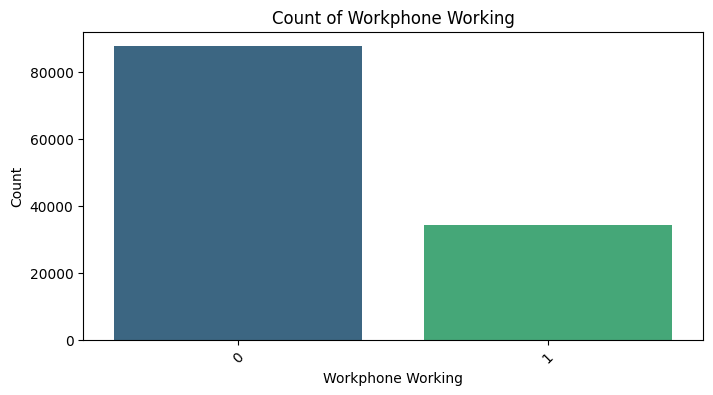

In [541]:
# Workphone_Working column analysis
print(df['Workphone_Working'].value_counts())
# graphical representation of the 'Workphone_Working' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Workphone_Working', data=df, palette='viridis')
plt.title('Count of Workphone Working')
plt.xlabel('Workphone Working')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Cleint_City_Rating
2.0    88949
3.0    17043
1.0    13455
Name: count, dtype: int64


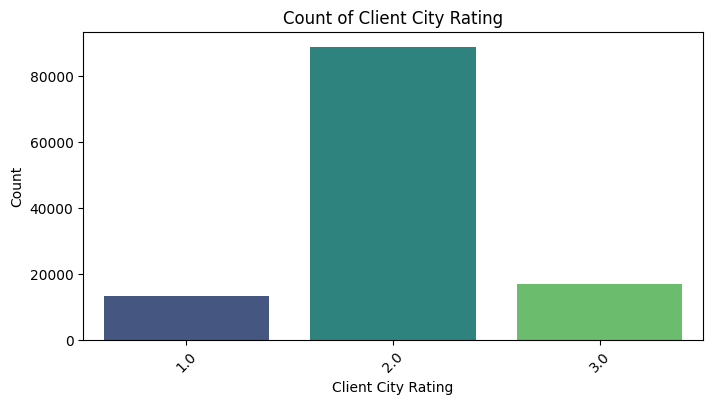

In [542]:
# Cleint_City_Rating column analysis
print(df['Cleint_City_Rating'].value_counts())
# graphical representation of the 'Cleint_City_Rating' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Cleint_City_Rating', data=df, palette='viridis')
plt.title('Count of Client City Rating')
plt.xlabel('Client City Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Application_Process_Day
2.0    20907
3.0    20116
1.0    19712
4.0    19668
5.0    19613
6.0    13125
0.0     6287
Name: count, dtype: int64


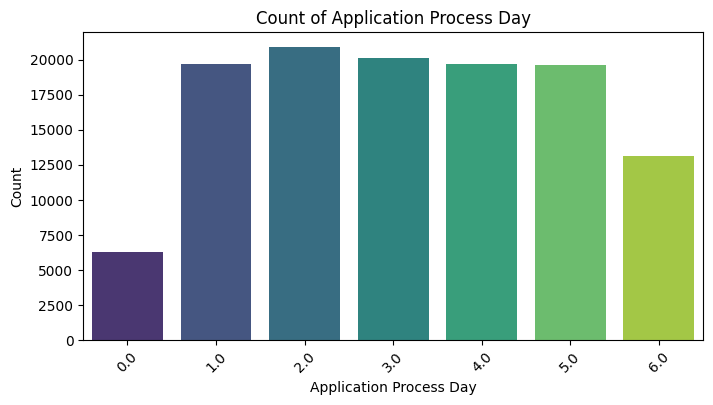

In [543]:
# Application_Process_Day column analysis
print(df['Application_Process_Day'].value_counts())
# graphical representation of the 'Application_Process_Day' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Application_Process_Day', data=df, palette='viridis')
plt.title('Count of Application Process Day')
plt.xlabel('Application Process Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Client_Permanent_Match_Tag
Yes    112454
No       9402
Name: count, dtype: int64


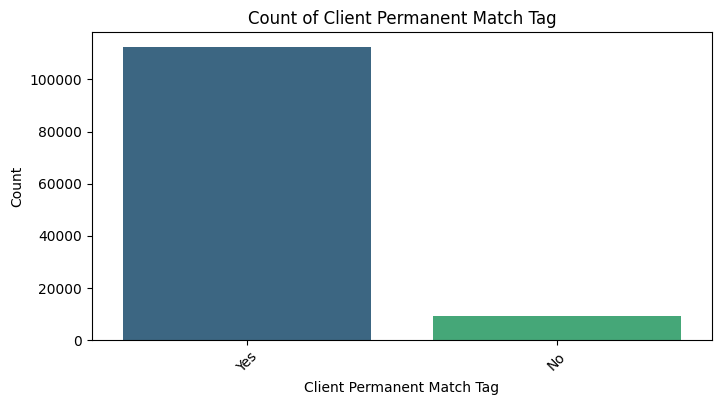

In [544]:
# Client_Permanent_Match_Tag column analysis
print(df['Client_Permanent_Match_Tag'].value_counts())
# graphical representation of the 'Client_Permanent_Match_Tag' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Client_Permanent_Match_Tag', data=df, palette='viridis')
plt.title('Count of Client Permanent Match Tag')
plt.xlabel('Client Permanent Match Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Client_Contact_Work_Tag
Yes    100015
No      21841
Name: count, dtype: int64


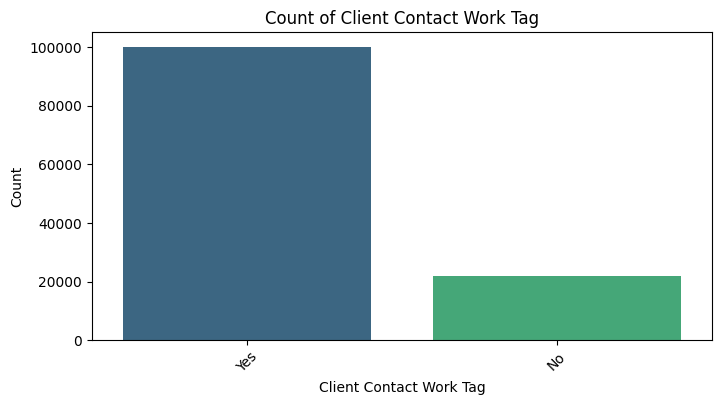

In [545]:
# Client_Contact_Work_Tag column analysis
print(df['Client_Contact_Work_Tag'].value_counts())
# graphical representation of the 'Client_Contact_Work_Tag' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Client_Contact_Work_Tag', data=df, palette='viridis')
plt.title('Count of Client Contact Work Tag')
plt.xlabel('Client Contact Work Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Default
0    112011
1      9845
Name: count, dtype: int64


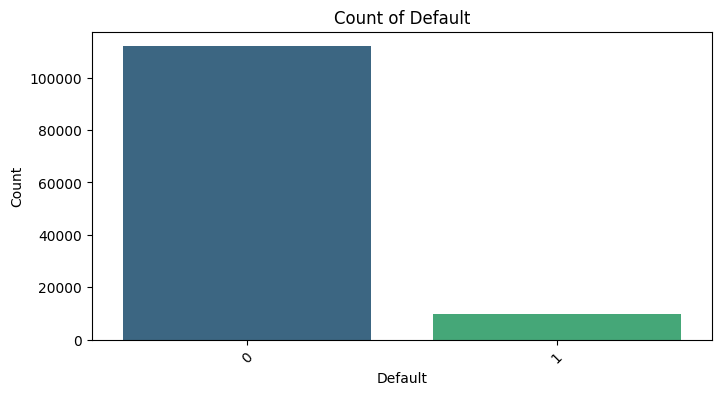

In [546]:
# Default column analysis
print(df['Default'].value_counts())
# graphical representation of the 'Default' column
plt.figure(figsize=(8, 4))
sns.countplot(x='Default', data=df, palette='viridis')
plt.title('Count of Default')
plt.xlabel('Default')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()  

count    1.182340e+05
mean     1.686519e+04
std      1.153815e+04
min      2.565000e+03
25%      1.125000e+04
50%      1.440000e+04
75%      2.025000e+04
max      1.800009e+06
Name: Client_Income, dtype: float64


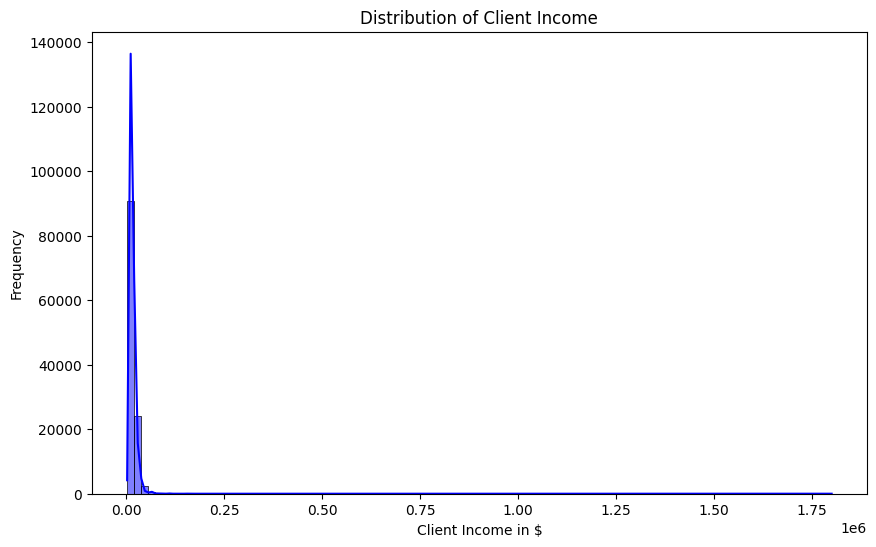

In [547]:
# Client_Income column analysis
client_income_numeric = pd.to_numeric(df['Client_Income'], errors='coerce')
print(client_income_numeric.describe())
# graphical representation of the 'Client_Income' column
plt.figure(figsize=(10, 6))
numeric_data = client_income_numeric.dropna()  # Drop NaN values for plotting
sns.histplot(numeric_data, bins=100, kde=True, color='blue')
plt.title('Distribution of Client Income')
plt.xlabel('Client Income in $')
plt.ylabel('Frequency')
plt.show()


count    118219.000000
mean      60046.488951
std       40350.663346
min        4500.000000
25%       27000.000000
50%       51750.000000
75%       80865.000000
max      405000.000000
Name: Credit_Amount, dtype: float64


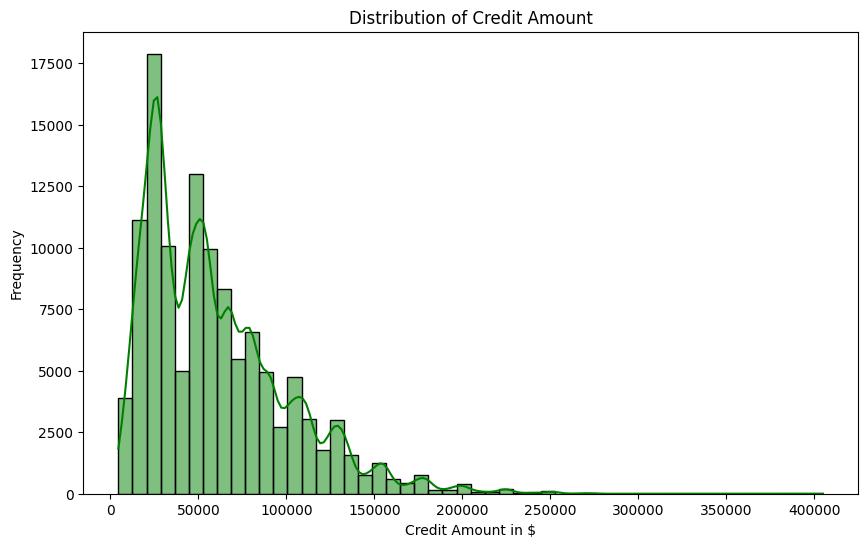

In [548]:
# Credit_Amount column analysis
credit_amount_numeric = pd.to_numeric(df['Credit_Amount'], errors='coerce')
print(credit_amount_numeric.describe())
# graphical representation of the 'Credit_Amount' column
plt.figure(figsize=(10, 6))
numeric_data = credit_amount_numeric.dropna()  # Drop NaN values for plotting
sns.histplot(numeric_data, bins=50, kde=True, color='green')
plt.title('Distribution of Credit Amount')
plt.xlabel('Credit Amount in $')
plt.ylabel('Frequency')
plt.show()

count    117030.000000
mean       2721.254492
std        1461.466162
min         217.350000
25%        1657.350000
50%        2499.750000
75%        3466.800000
max       22500.000000
Name: Loan_Annuity, dtype: float64


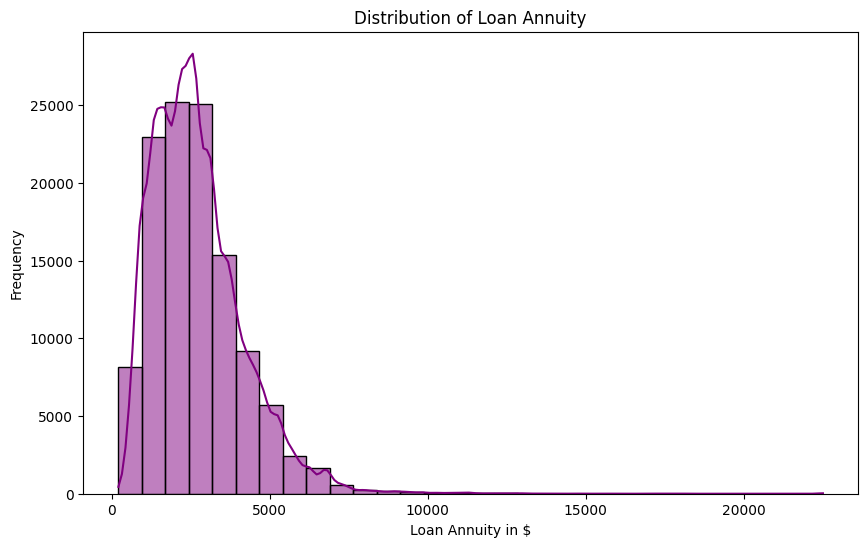

In [549]:
# Loan_Annuity column analysis
loan_annuity_numeric = pd.to_numeric(df['Loan_Annuity'], errors='coerce')
print(loan_annuity_numeric.describe())
# graphical representation of the 'Loan_Annuity' column
plt.figure(figsize=(10, 6))
numeric_data = loan_annuity_numeric.dropna()  # Drop NaN values for plotting
sns.histplot(numeric_data, bins=30, kde=True, color='purple')
plt.title('Distribution of Loan Annuity')
plt.xlabel('Loan Annuity in $')
plt.ylabel('Frequency')
plt.show()

count    118190.000000
mean      67154.070615
std      138971.782951
min           0.000000
25%         932.000000
50%        2212.000000
75%        5634.000000
max      365243.000000
Name: Employed_Days, dtype: float64


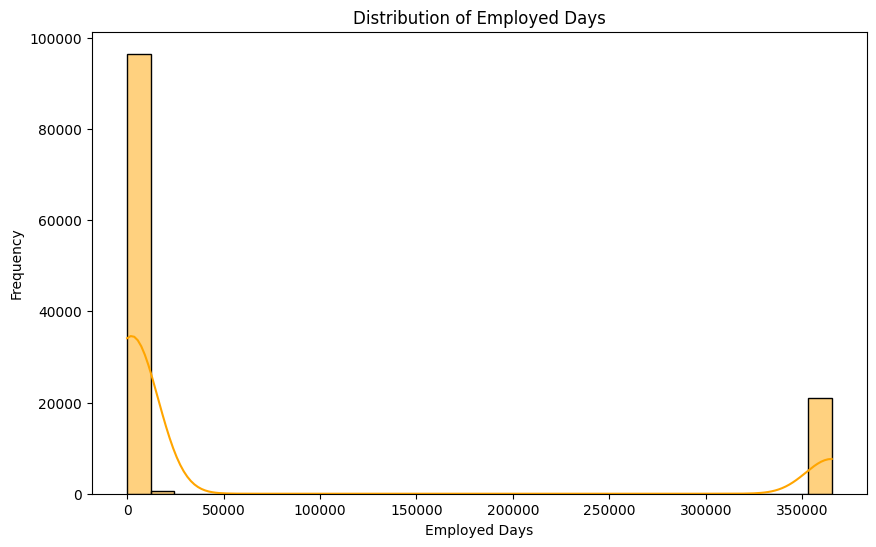

In [550]:
# Employed_Days column analysis
employed_days_numeric = pd.to_numeric(df['Employed_Days'], errors='coerce')
print(employed_days_numeric.describe())
# graphical representation of the 'Employed_Days' column
plt.figure(figsize=(10, 6))
numeric_data = employed_days_numeric.dropna()  # Drop NaN values for plotting
sns.histplot(numeric_data, bins=30, kde=True, color='orange')
plt.title('Distribution of Employed Days')
plt.xlabel('Employed Days')
plt.ylabel('Frequency')
plt.show()

count    118225.000000
mean       4975.162123
std        3514.546963
min           0.000000
25%        2008.000000
50%        4493.000000
75%        7464.000000
max       23738.000000
Name: Registration_Days, dtype: float64


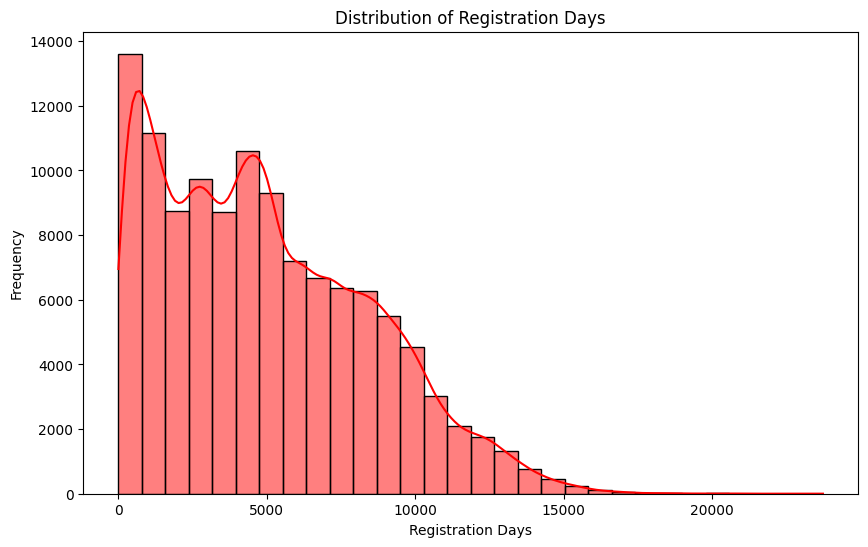

In [551]:
# Registration_Days column analysis
registration_days_numeric = pd.to_numeric(df['Registration_Days'], errors='coerce')
print(registration_days_numeric.describe())
# graphical representation of the 'Registration_Days' column
plt.figure(figsize=(10, 6))
numeric_data = registration_days_numeric.dropna()  # Drop NaN values for plotting
sns.histplot(numeric_data, bins=30, kde=True, color='red')
plt.title('Distribution of Registration Days')
plt.xlabel('Registration Days')
plt.ylabel('Frequency')
plt.show()


count    41761.000000
mean        12.157324
std         12.056079
min          0.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         69.000000
Name: Own_House_Age, dtype: float64


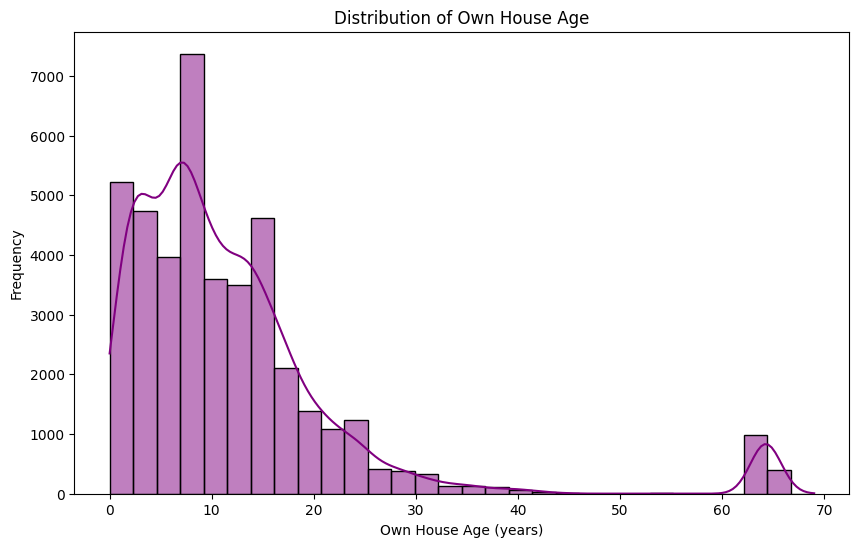

In [552]:
# Own_House_Age column analysis
own_house_age_numeric = pd.to_numeric(df['Own_House_Age'], errors='coerce')
print(own_house_age_numeric.describe())
# graphical representation of the 'Own_House_Age' column
plt.figure(figsize=(10, 6))
numeric_data = own_house_age_numeric.dropna()  # Drop NaN values for plotting
sns.histplot(numeric_data, bins=30, kde=True, color='purple')
plt.title('Distribution of Own House Age')
plt.xlabel('Own House Age (years)')
plt.ylabel('Frequency')
plt.show()

Client_Occupation
Laborers              21024
Sales                 12136
Core                  10611
Managers               8099
Drivers                7150
High skill tech        4317
Accountants            3766
Medicine               3172
Security               2683
Cooking                2224
Cleaning               1722
Private service        1006
Low-skill Laborers      787
Secretaries             531
Waiters/barmen          511
Realty agents           280
HR                      206
IT                      196
Name: count, dtype: int64


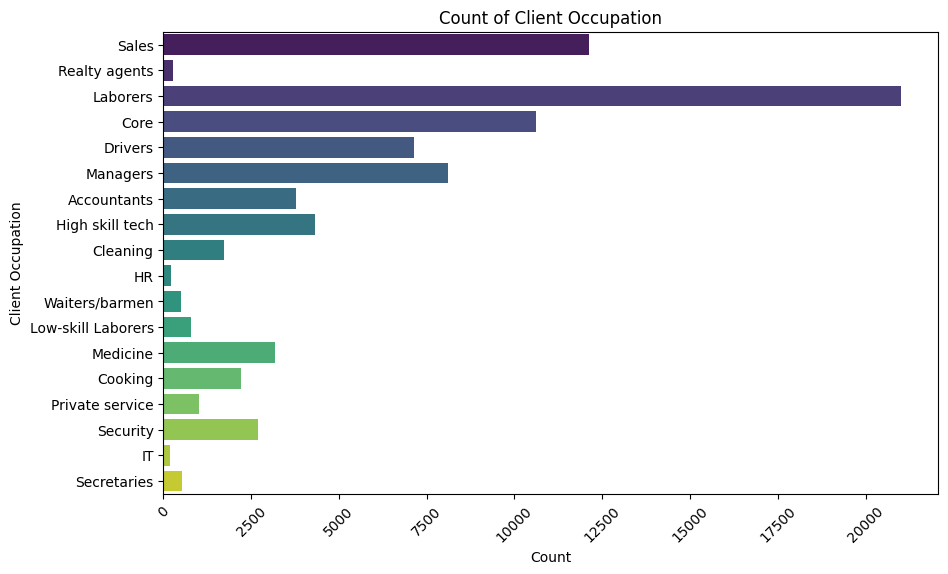

In [553]:
# Client_Occupation column analysis
print(df['Client_Occupation'].value_counts())
# graphical representation of the 'Client_Occupation' column
plt.figure(figsize=(10, 6))
sns.countplot(y='Client_Occupation', data=df, palette='viridis')
plt.title('Count of Client Occupation')
plt.xlabel('Count')
plt.ylabel('Client Occupation')
plt.xticks(rotation=45)
plt.show()

Client_Family_Members
2.0     61652
1.0     26213
3.0     20434
4.0      9583
5.0      1349
6.0       157
7.0        32
8.0        11
9.0         4
10.0        3
12.0        3
16.0        2
13.0        1
14.0        1
15.0        1
Name: count, dtype: int64


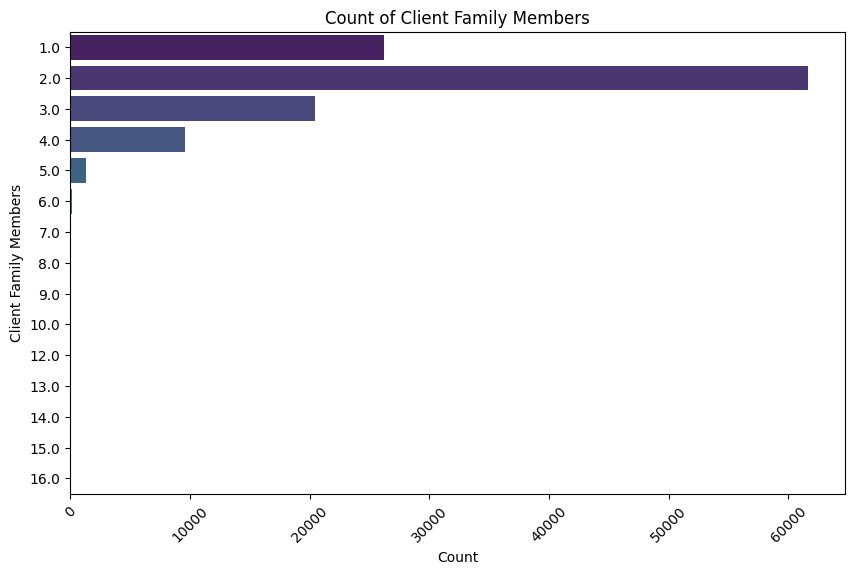

In [554]:
# Client_Family_Members column analysis
print(df['Client_Family_Members'].value_counts())
# graphical representation of the 'Client_Family_Members' column
plt.figure(figsize=(10, 6))
sns.countplot(y='Client_Family_Members', data=df, palette='viridis')
plt.title('Count of Client Family Members')
plt.xlabel('Count')
plt.ylabel('Client Family Members')
plt.xticks(rotation=45)
plt.show()

Cleint_City_Rating
2.0    88949
3.0    17043
1.0    13455
Name: count, dtype: int64


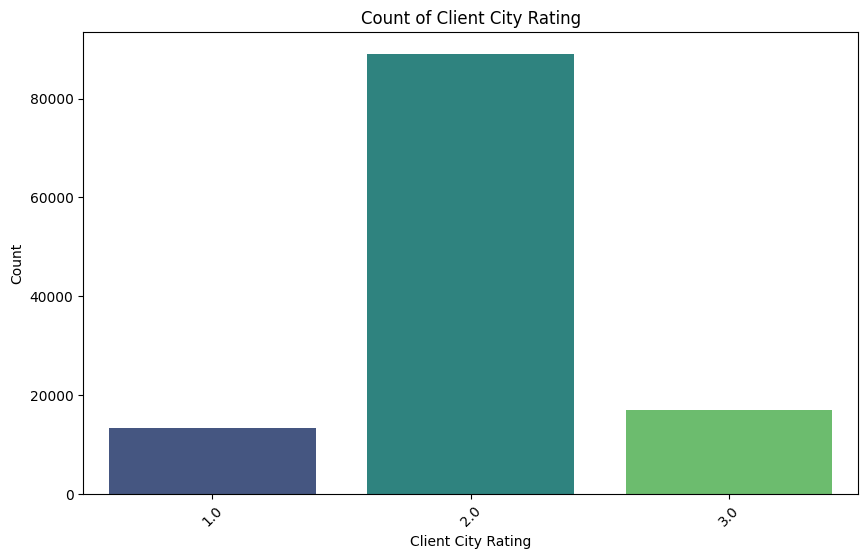

In [555]:
# Cleint_City_Rating column analysis
print(df['Cleint_City_Rating'].value_counts())
# graphical representation of the 'Cleint_City_Rating' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Cleint_City_Rating', data=df, palette='viridis')
plt.title('Count of Client City Rating')
plt.xlabel('Client City Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


count    53021.000000
mean         0.501213
std          0.211204
min          0.014568
25%          0.333481
50%          0.504657
75%          0.673890
max          0.945741
Name: Score_Source_1, dtype: float64


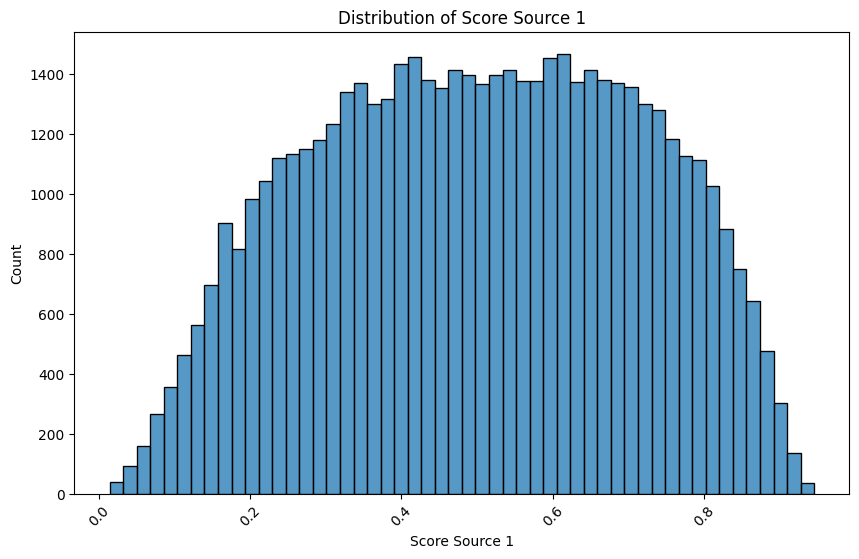

In [556]:
# Score_Source_1 column analysis
print(df['Score_Source_1'].describe())
# graphical representation of the 'Score_Source_1' column
plt.figure(figsize=(10, 6))
sns.histplot(x='Score_Source_1', data=df, palette='viridis')
plt.title('Distribution of Score Source 1')
plt.xlabel('Score Source 1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

count    116170.000000
mean          0.518625
std           0.740248
min           0.000005
25%           0.390164
50%           0.564978
75%           0.664011
max         100.000000
Name: Score_Source_2, dtype: float64


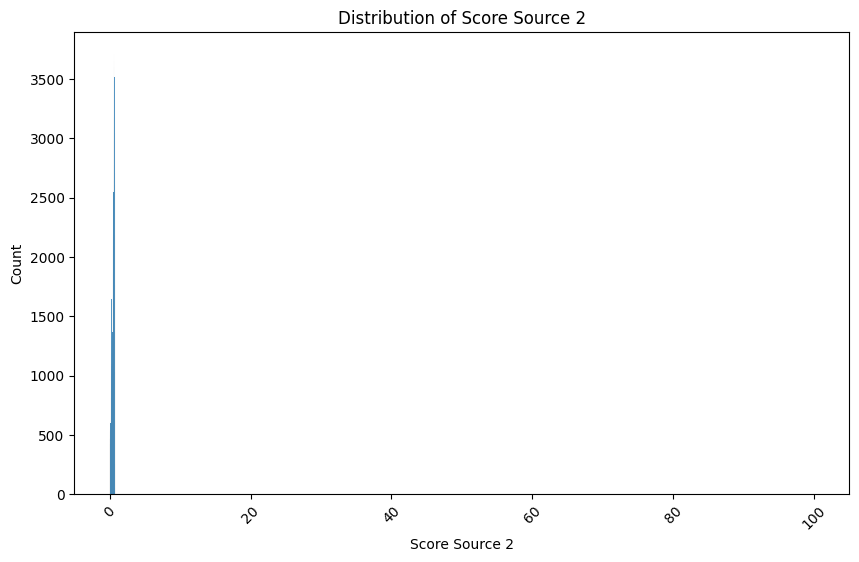

In [557]:
# Score_Source_2 column analysis
print(df['Score_Source_2'].describe())
# graphical representation of the 'Score_Source_2' column
plt.figure(figsize=(10, 6))
sns.histplot(x='Score_Source_2', data=df, palette='viridis')
plt.title('Distribution of Score Source 2')
plt.xlabel('Score Source 2')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


count    94934.000000
mean         0.511180
std          0.194333
min          0.000527
25%          0.372334
50%          0.537070
75%          0.667458
max          0.896010
Name: Score_Source_3, dtype: float64


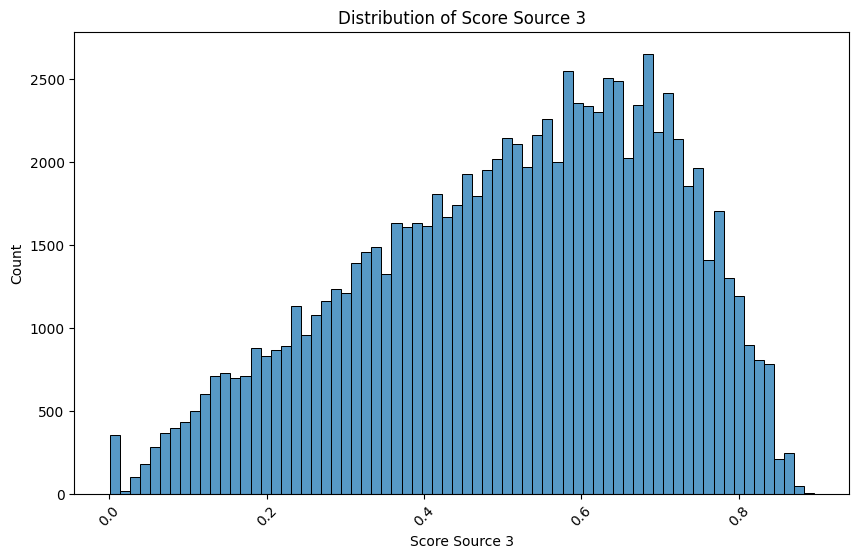

In [558]:
# Score_Source_3 column analysis
score_source_3_numeric = pd.to_numeric(df['Score_Source_3'], errors='coerce')
print(score_source_3_numeric.describe())
# graphical representation of the 'Score_Source_3' column
plt.figure(figsize=(10, 6))
sns.histplot(x=score_source_3_numeric, data=df, palette='viridis')
plt.title('Distribution of Score Source 3')
plt.xlabel('Score Source 3')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

0    0.0186
1       NaN
2    0.0742
3       NaN
4    0.2021
Name: Social_Circle_Default, dtype: float64
count    59928.000000
mean         0.117428
std          0.107974
min          0.000000
25%          0.057700
50%          0.088700
75%          0.148500
max          1.000000
Name: Social_Circle_Default, dtype: float64


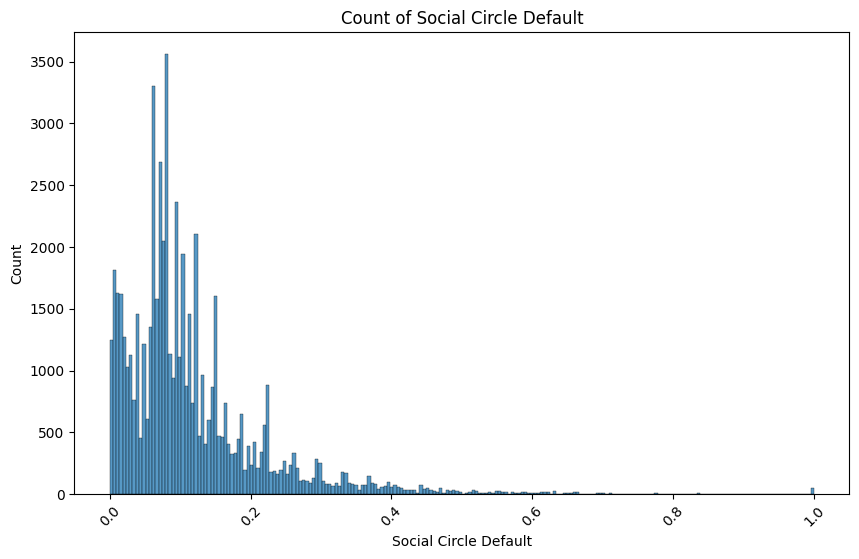

In [559]:
# Social_Circle_Default column analysis
print(df['Social_Circle_Default'].head())
print(df['Social_Circle_Default'].describe())
# graphical representation of the 'Social_Circle_Default' column
plt.figure(figsize=(10, 6))
sns.histplot(x='Social_Circle_Default', data=df, palette='viridis')
plt.title('Count of Social Circle Default')
plt.xlabel('Social Circle Default')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

count    118192.000000
mean        962.106056
std         827.976726
min           0.000000
25%         272.000000
50%         755.000000
75%        1570.000000
max        4185.000000
Name: Phone_Change, dtype: float64


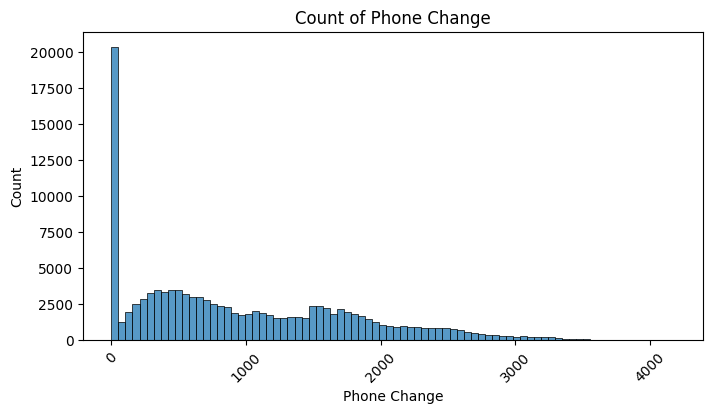

In [560]:
# Phone_Change column analysis
print(df['Phone_Change'].describe())
# graphical representation of the 'Phone_Change' column
plt.figure(figsize=(8, 4))
sns.histplot(x='Phone_Change', data=df, palette='viridis')
plt.title('Count of Phone Change')
plt.xlabel('Phone Change')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

count    103316.000000
mean          1.891082
std           1.861921
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          22.000000
Name: Credit_Bureau, dtype: float64


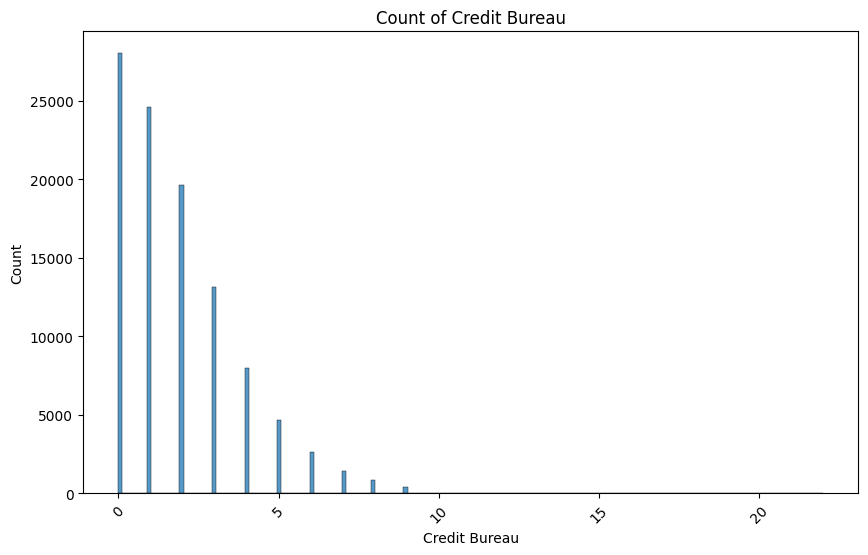

In [561]:
# Credit_Bureau column analysis
print(df['Credit_Bureau'].describe())
# graphical representation of the 'Credit_Bureau' column
plt.figure(figsize=(10, 6))
sns.histplot(x='Credit_Bureau', data=df, palette='viridis')
plt.title('Count of Credit Bureau')
plt.xlabel('Credit Bureau')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis

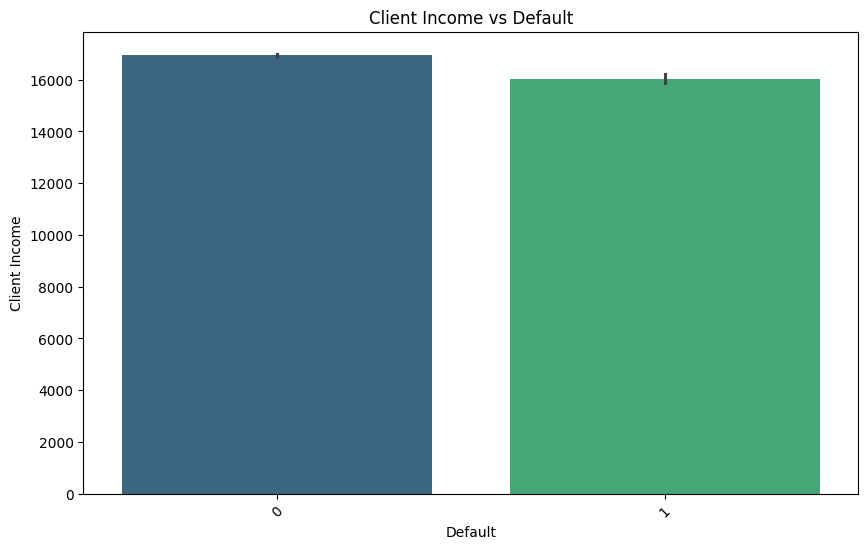

In [562]:
# Client_Income (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
client_income_numeric = pd.to_numeric(df['Client_Income'], errors='coerce')
sns.barplot(x='Default', y=client_income_numeric, data=df, palette='viridis')
plt.title('Client Income vs Default')
plt.xlabel('Default')
plt.ylabel('Client Income')
plt.xticks(rotation=45)
plt.show()

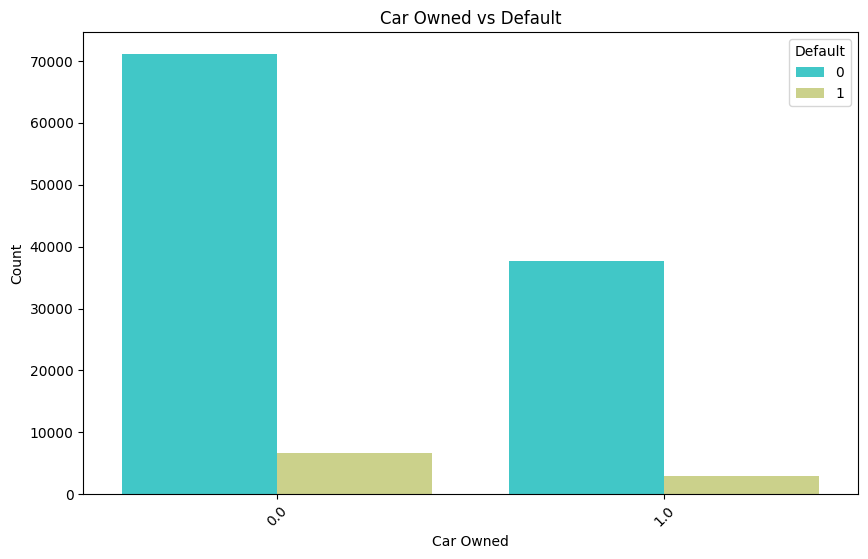

In [563]:
# Car_Owned (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Car_Owned', hue='Default', data=df, palette='rainbow')
plt.title('Car Owned vs Default')
plt.xlabel('Car Owned')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

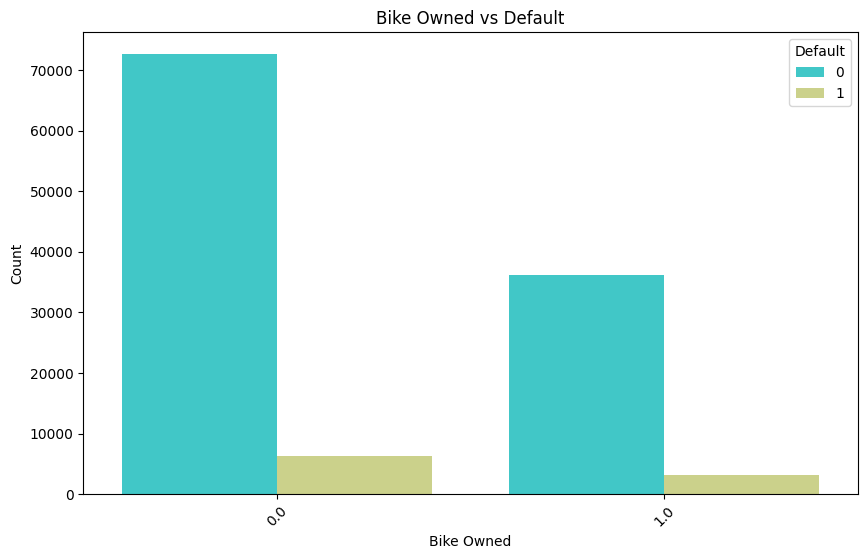

In [564]:
# Bike_Owned (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Bike_Owned', hue='Default', data=df, palette='rainbow')
plt.title('Bike Owned vs Default')
plt.xlabel('Bike Owned')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

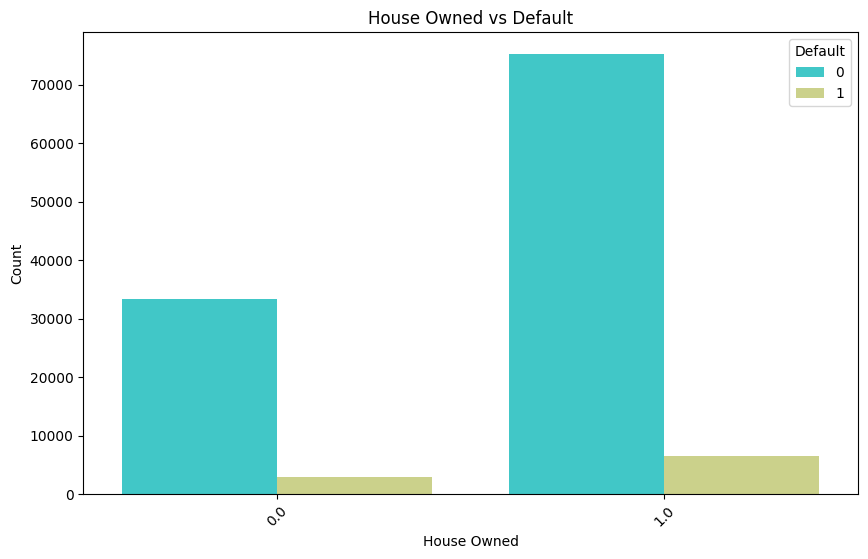

In [565]:
# House_Own (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='House_Own', hue='Default', data=df, palette='rainbow')
plt.title('House Owned vs Default')
plt.xlabel('House Owned')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

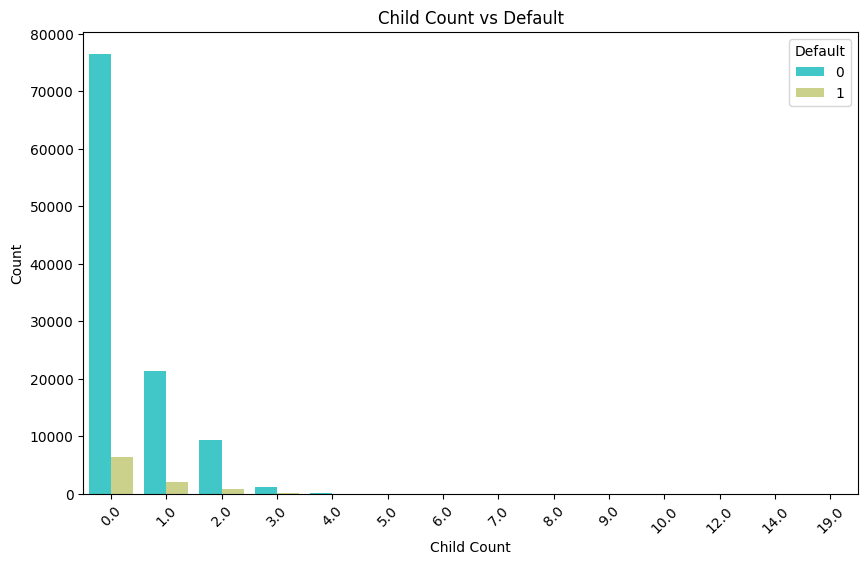

In [566]:
# Child_Count (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Child_Count', hue='Default', data=df, palette='rainbow')
plt.title('Child Count vs Default')
plt.xlabel('Child Count')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

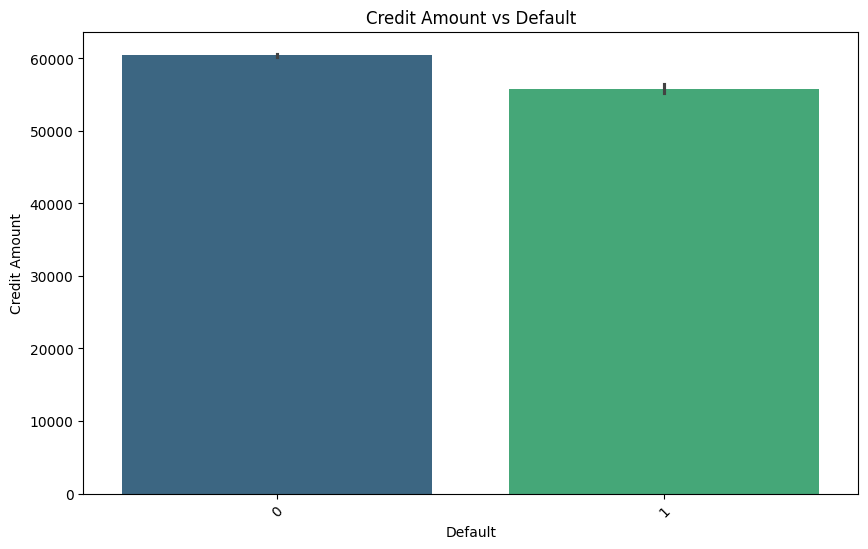

In [567]:
# Credit_Amount (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
credit_amount_numeric = pd.to_numeric(df['Credit_Amount'], errors='coerce')
sns.barplot(x='Default', y=credit_amount_numeric, data=df, palette='viridis')
plt.title('Credit Amount vs Default')
plt.xlabel('Default')
plt.ylabel('Credit Amount')
plt.xticks(rotation=45)
plt.show()

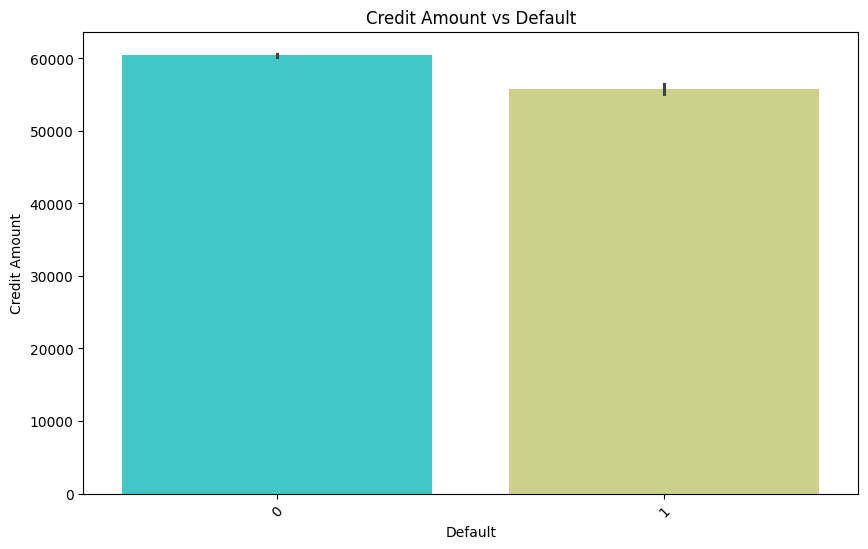

In [568]:
# Credit_Amount (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
credit_amount_numeric = pd.to_numeric(df['Credit_Amount'], errors='coerce')
sns.barplot(x='Default', y=credit_amount_numeric, data=df, palette='rainbow')
plt.title('Credit Amount vs Default')
plt.xlabel('Default')
plt.ylabel('Credit Amount')
plt.xticks(rotation=45)
plt.show()

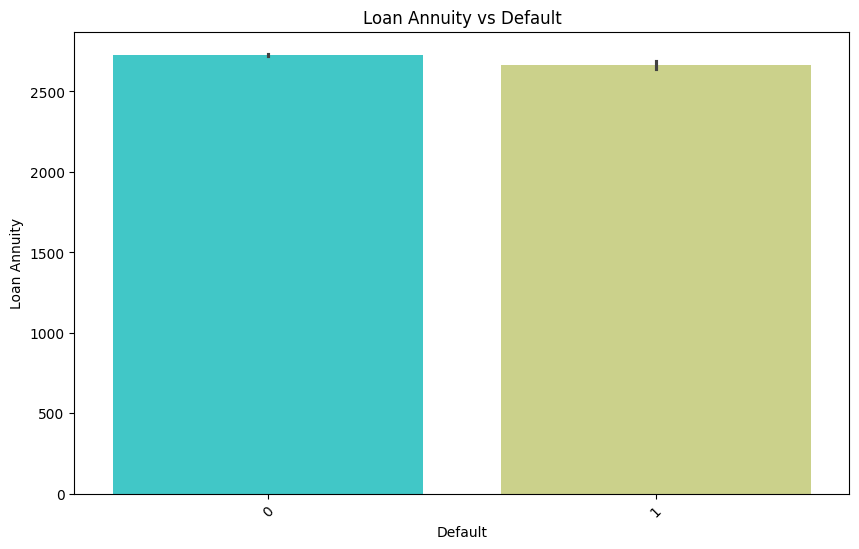

In [569]:
# Loan_Annuity (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
loan_annuity_numeric = pd.to_numeric(df['Loan_Annuity'], errors='coerce')
sns.barplot(x='Default', y=loan_annuity_numeric, data=df, palette='rainbow')
plt.title('Loan Annuity vs Default')
plt.xlabel('Default')
plt.ylabel('Loan Annuity')
plt.xticks(rotation=45)
plt.show()

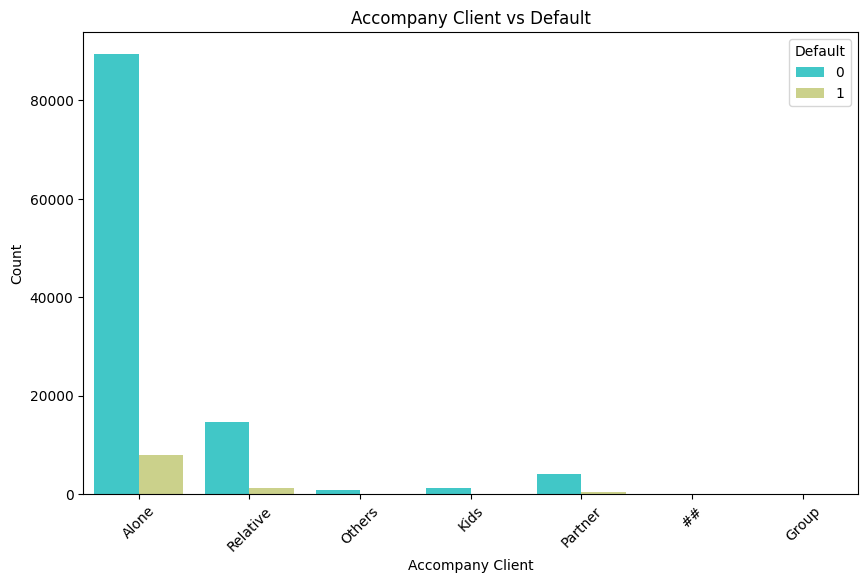

In [570]:
# Accompany_Client (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Accompany_Client', hue='Default', data=df, palette='rainbow')
plt.title('Accompany Client vs Default')
plt.xlabel('Accompany Client')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

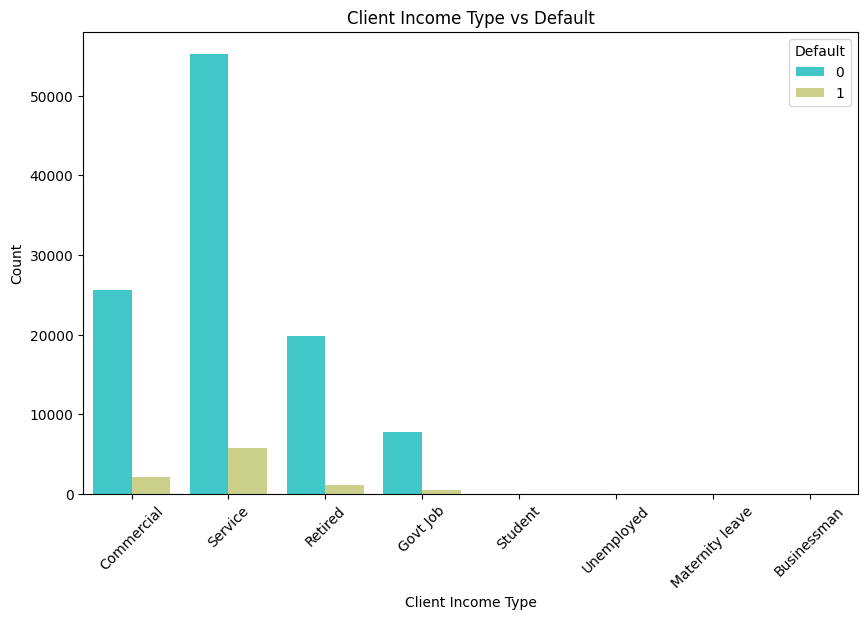

In [571]:
# Client_Income_Type column analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Client_Income_Type', hue='Default', data=df, palette='rainbow')
plt.title('Client Income Type vs Default')
plt.xlabel('Client Income Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

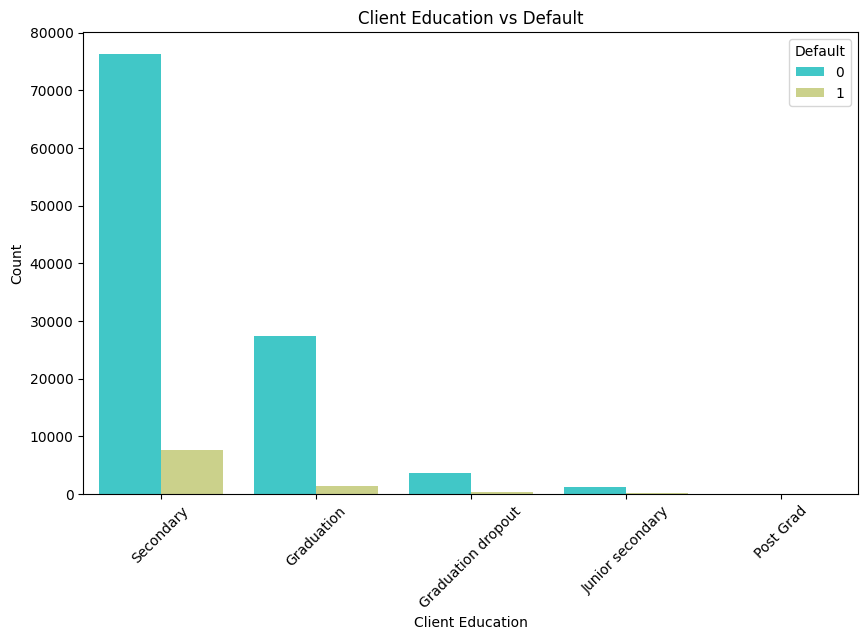

In [572]:
# Client_Education (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Client_Education', hue='Default', data=df, palette='rainbow')
plt.title('Client Education vs Default')
plt.xlabel('Client Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

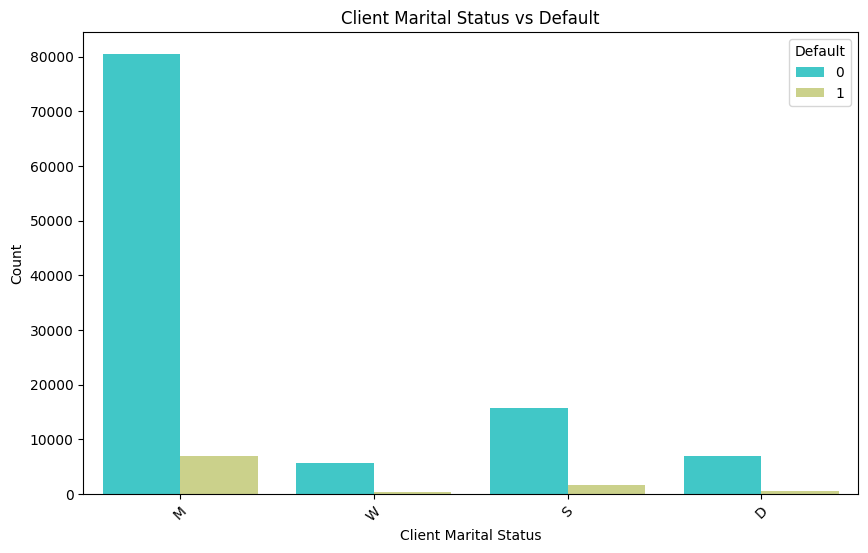

In [573]:
# Client_Marital_Status (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Client_Marital_Status', hue='Default', data=df, palette='rainbow')
plt.title('Client Marital Status vs Default')
plt.xlabel('Client Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

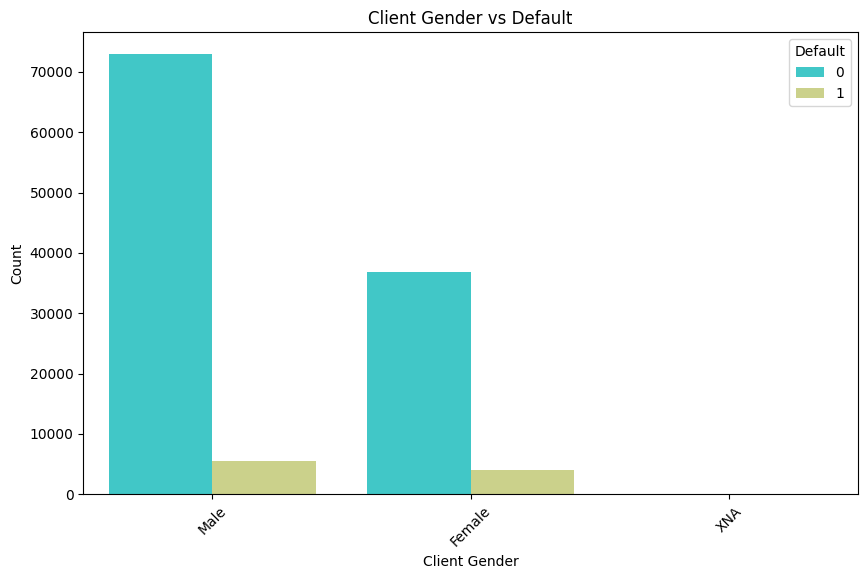

In [574]:
# Client_Gender column analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Client_Gender', hue='Default', data=df, palette='rainbow')
plt.title('Client Gender vs Default')
plt.xlabel('Client Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

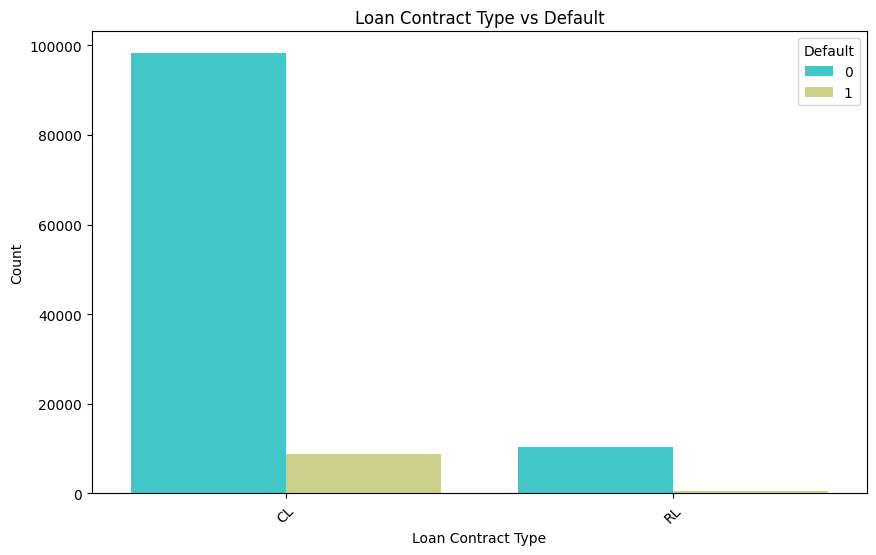

In [575]:
# Loan_Contract_Type (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Loan_Contract_Type', hue='Default', data=df, palette='rainbow')
plt.title('Loan Contract Type vs Default')
plt.xlabel('Loan Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()  

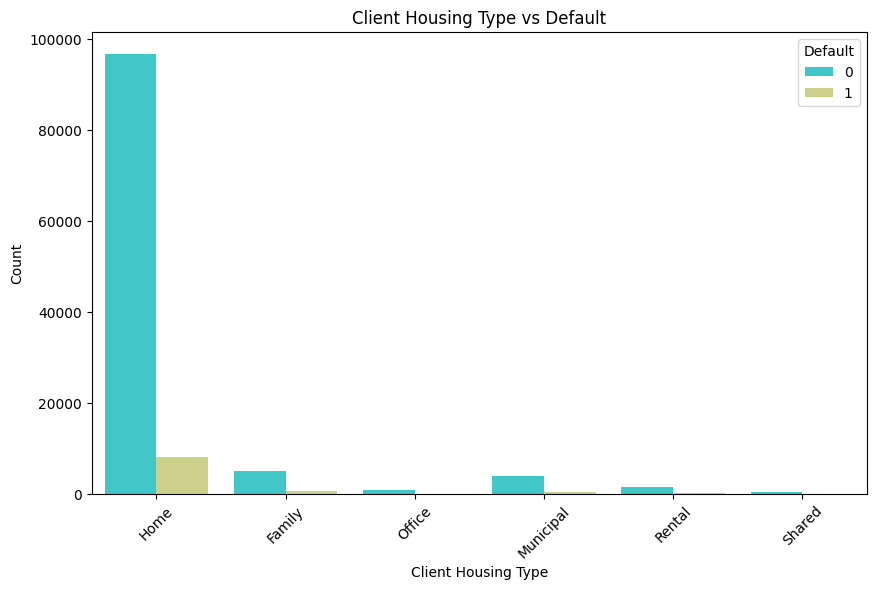

In [576]:
# Client_Housing_Type (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Client_Housing_Type', hue='Default', data=df, palette='rainbow')
plt.title('Client Housing Type vs Default')
plt.xlabel('Client Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

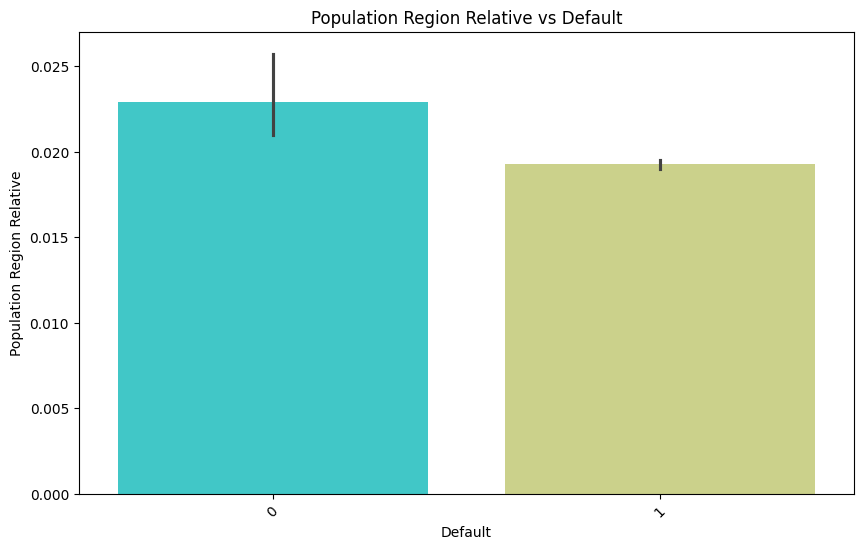

In [577]:
# Population_Region_Relative (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
population_region_relative_numeric = pd.to_numeric(df['Population_Region_Relative'], errors='coerce')
sns.barplot(x='Default', y=population_region_relative_numeric, data=df, palette='rainbow')
plt.title('Population Region Relative vs Default')
plt.xlabel('Default')
plt.ylabel('Population Region Relative')
plt.xticks(rotation=45)
plt.show()

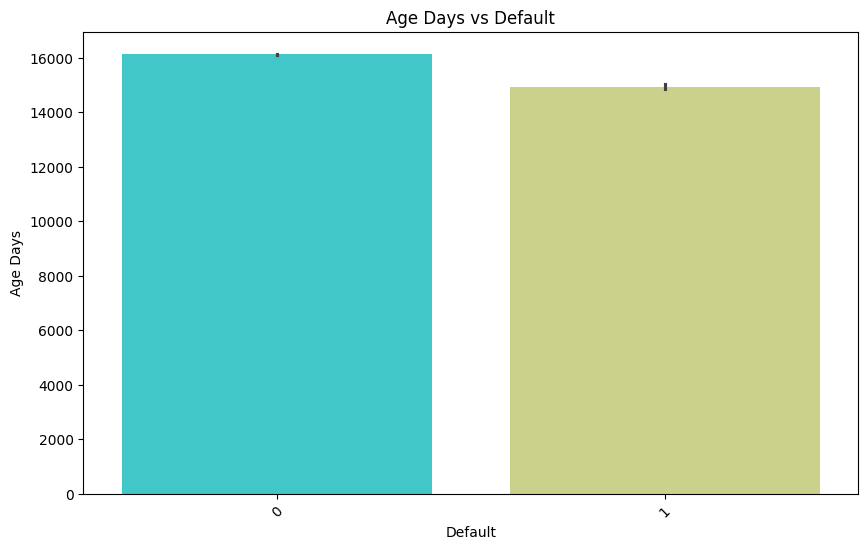

In [578]:
# Age_Days (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
age_days_numeric = pd.to_numeric(df['Age_Days'], errors='coerce')
sns.barplot(x='Default', y=age_days_numeric, data=df, palette='rainbow')
plt.title('Age Days vs Default')
plt.xlabel('Default')
plt.ylabel('Age Days')
plt.xticks(rotation=45)
plt.show()

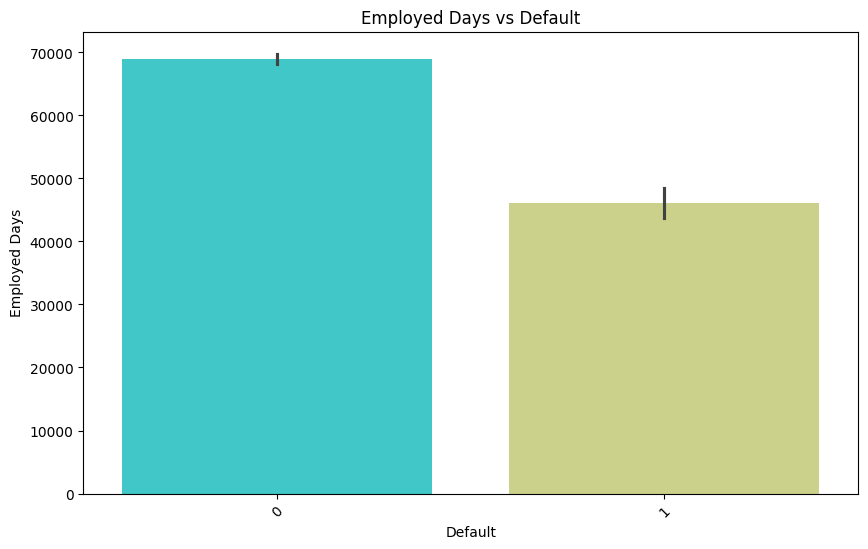

In [579]:
# Employed_Days (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
employed_days_numeric = pd.to_numeric(df['Employed_Days'], errors='coerce')
sns.barplot(x='Default', y=employed_days_numeric, data=df, palette='rainbow')
plt.title('Employed Days vs Default')
plt.xlabel('Default')
plt.ylabel('Employed Days')
plt.xticks(rotation=45)
plt.show()

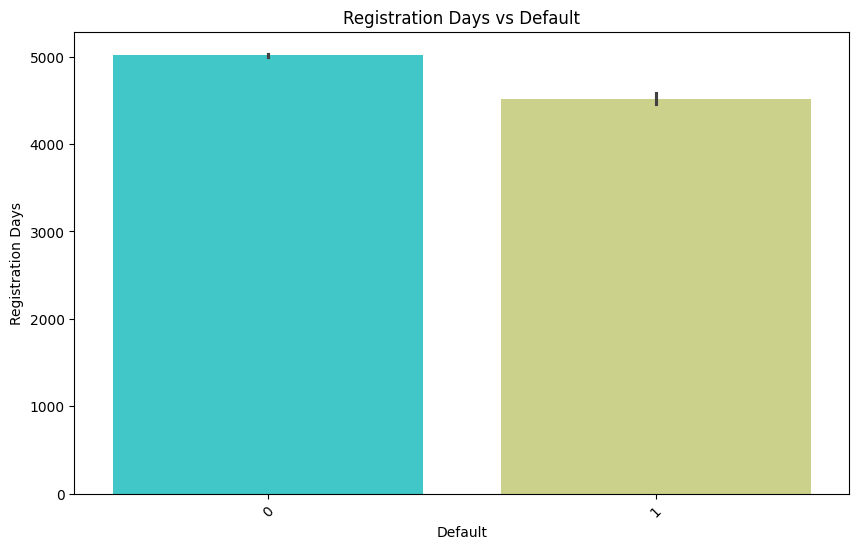

In [580]:
# Registration_Days (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
registration_days_numeric = pd.to_numeric(df['Registration_Days'], errors='coerce')
sns.barplot(x='Default', y=registration_days_numeric, data=df, palette='rainbow')
plt.title('Registration Days vs Default')
plt.xlabel('Default')
plt.ylabel('Registration Days')
plt.xticks(rotation=45)
plt.show()

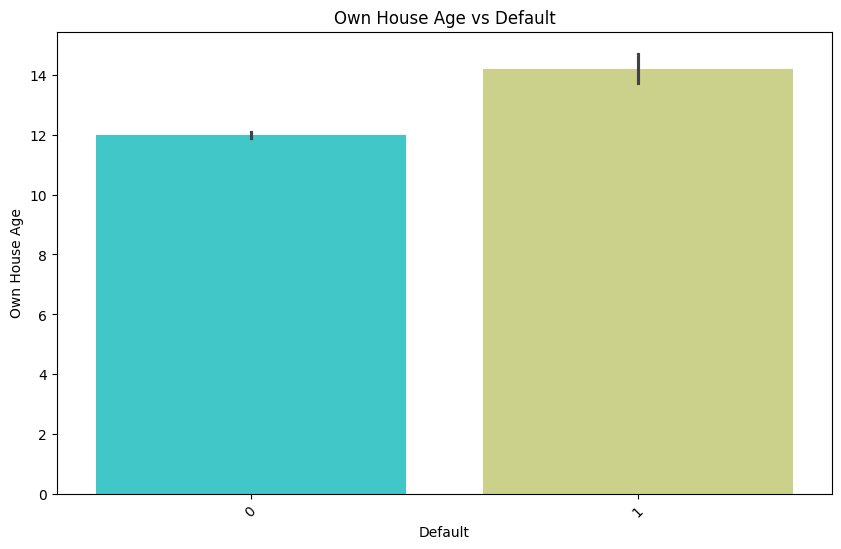

In [581]:
# Own_House_Age (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
own_house_age_numeric = pd.to_numeric(df['Own_House_Age'], errors='coerce')
sns.barplot(x='Default', y=own_house_age_numeric, data=df, palette='rainbow')
plt.title('Own House Age vs Default')
plt.xlabel('Default')
plt.ylabel('Own House Age')
plt.xticks(rotation=45)
plt.show()

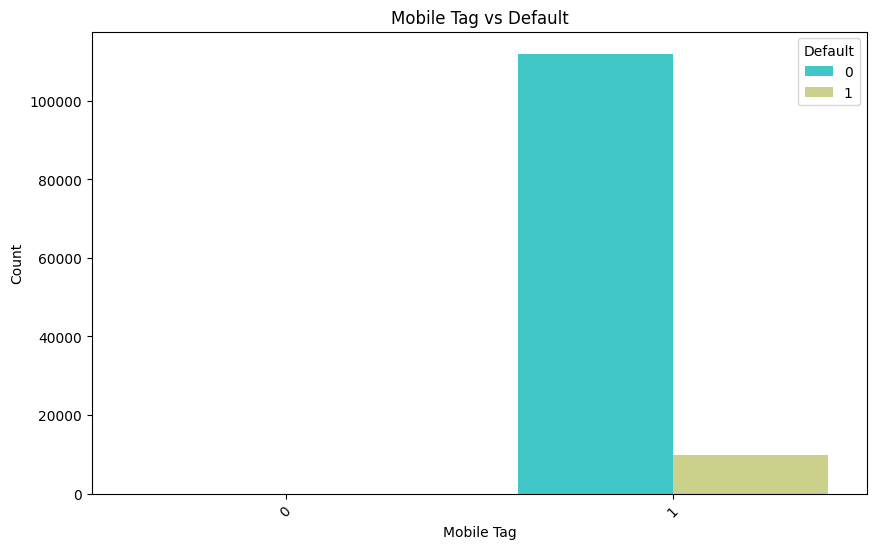

In [582]:
# Mobile_Tag (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Mobile_Tag', hue='Default', data=df, palette='rainbow')
plt.title('Mobile Tag vs Default')
plt.xlabel('Mobile Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

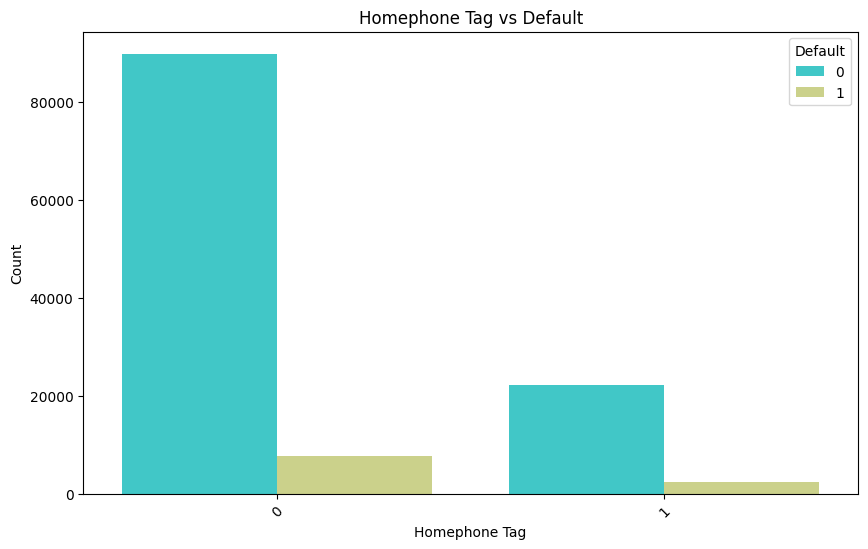

In [583]:
# Homephone_Tag (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Homephone_Tag', hue='Default', data=df, palette='rainbow')
plt.title('Homephone Tag vs Default')
plt.xlabel('Homephone Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()


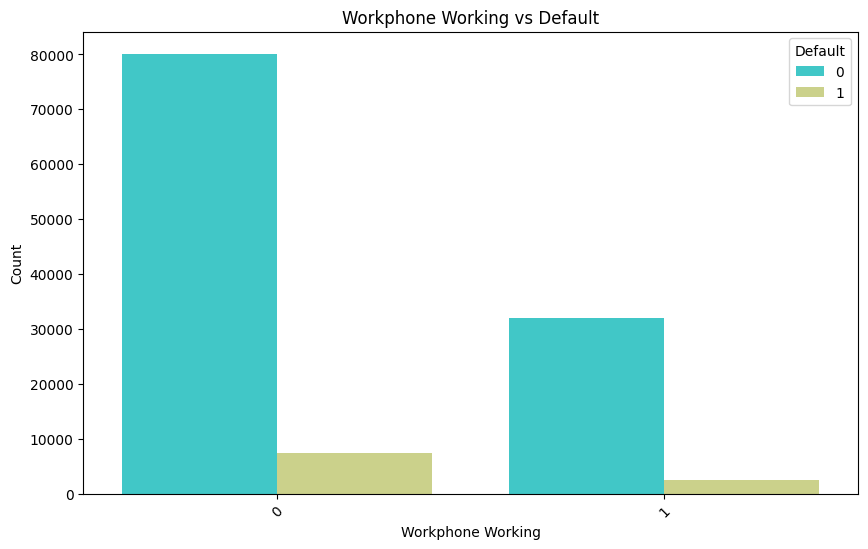

In [584]:
# Workphone_Working (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Workphone_Working', hue='Default', data=df, palette='rainbow')
plt.title('Workphone Working vs Default')
plt.xlabel('Workphone Working')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()


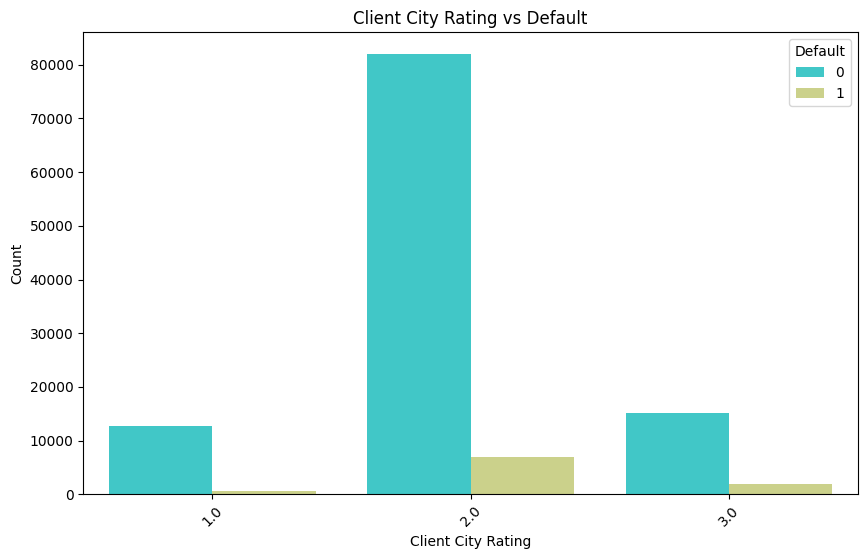

In [585]:
# Cleint_City_Rating (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Cleint_City_Rating', hue='Default', data=df, palette='rainbow')
plt.title('Client City Rating vs Default')
plt.xlabel('Client City Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()


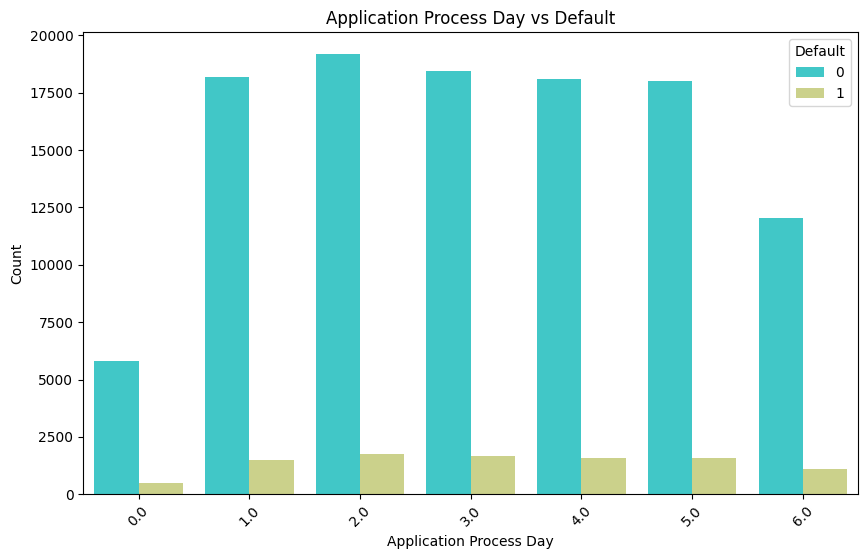

In [586]:
# Application_Process_Day (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Application_Process_Day', hue='Default', data=df, palette='rainbow')
plt.title('Application Process Day vs Default')
plt.xlabel('Application Process Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()


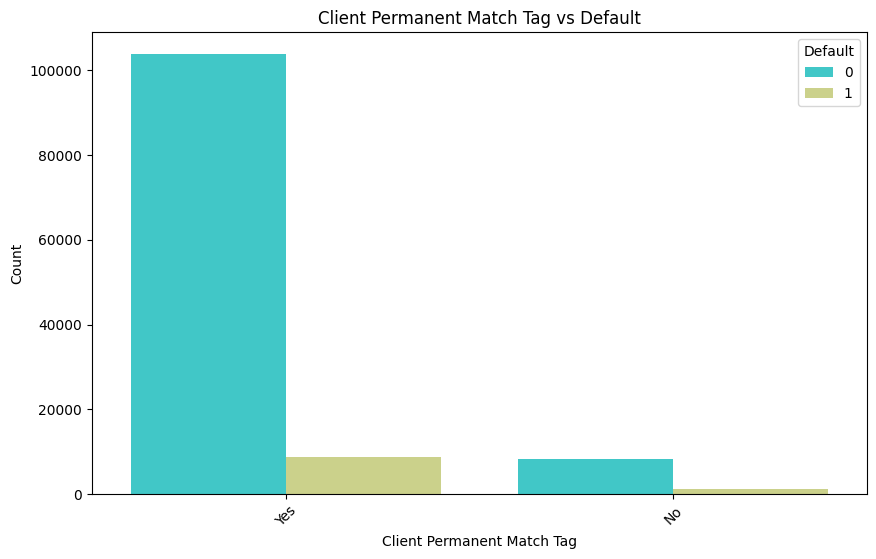

In [587]:
# Client_Permanent_Match_Tag (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Client_Permanent_Match_Tag', hue='Default', data=df, palette='rainbow')
plt.title('Client Permanent Match Tag vs Default')
plt.xlabel('Client Permanent Match Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()


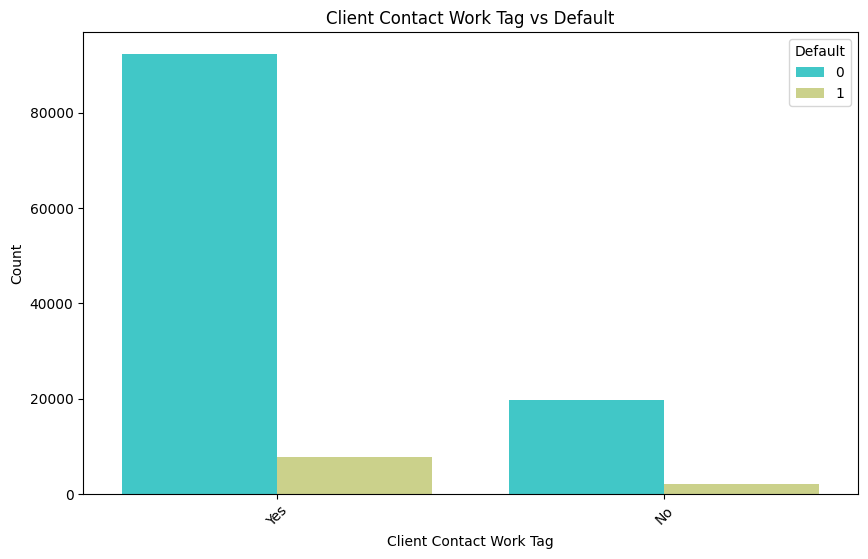

In [588]:
# Client_Contact_Work_Tag (categorical) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='Client_Contact_Work_Tag', hue='Default', data=df, palette='rainbow')
plt.title('Client Contact Work Tag vs Default')
plt.xlabel('Client Contact Work Tag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Default', loc='upper right')
plt.show()

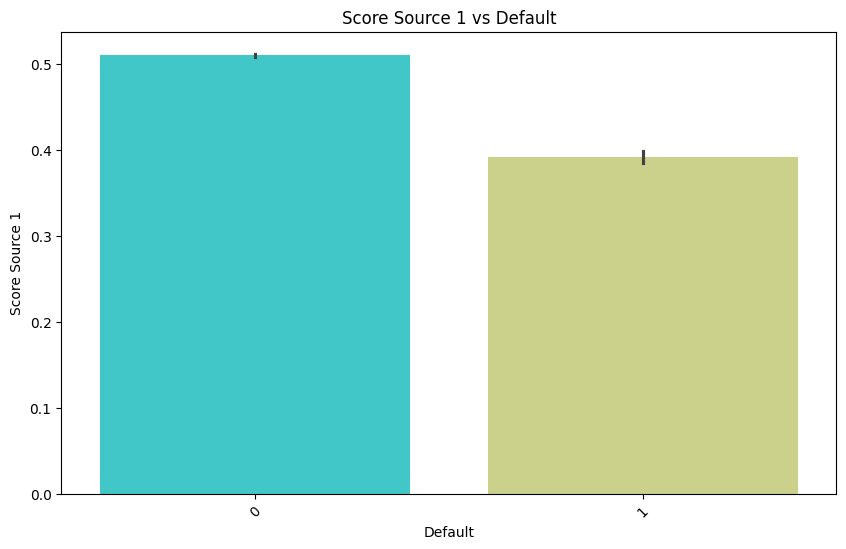

In [589]:
# Score_Source_1 (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
score_source_1_numeric = pd.to_numeric(df['Score_Source_1'], errors='coerce')
sns.barplot(x='Default', y=score_source_1_numeric, data=df, palette='rainbow')
plt.title('Score Source 1 vs Default')
plt.xlabel('Default')
plt.ylabel('Score Source 1')
plt.xticks(rotation=45)
plt.show()


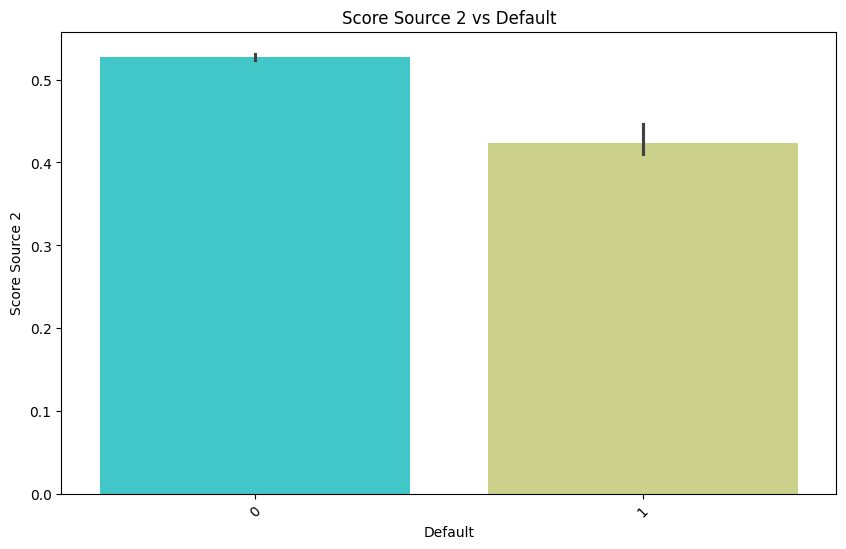

In [590]:
# Score_Source_2 (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
score_source_2_numeric = pd.to_numeric(df['Score_Source_2'], errors='coerce')
sns.barplot(x='Default', y=score_source_2_numeric, data=df, palette='rainbow')
plt.title('Score Source 2 vs Default')
plt.xlabel('Default')
plt.ylabel('Score Source 2')
plt.xticks(rotation=45)
plt.show()


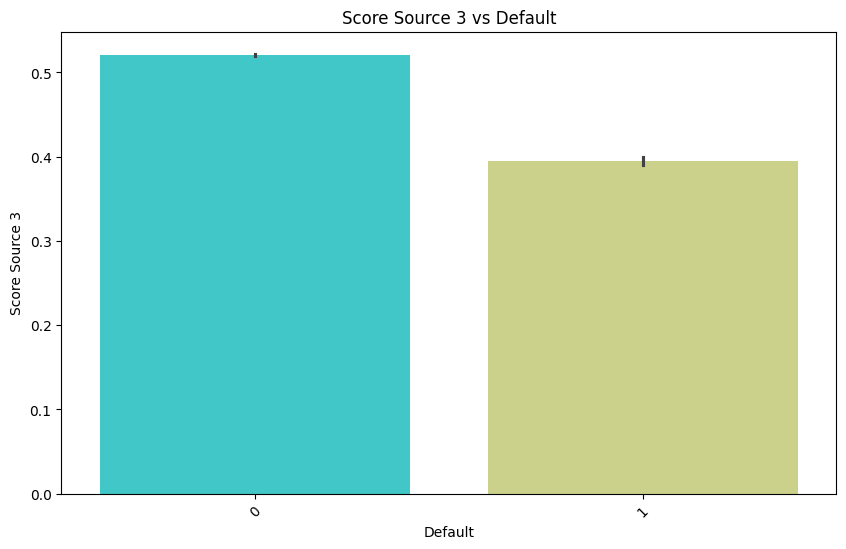

In [591]:
# Score_Source_3 (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
score_source_3_numeric = pd.to_numeric(df['Score_Source_3'], errors='coerce')
sns.barplot(x='Default', y=score_source_3_numeric, data=df, palette='rainbow')
plt.title('Score Source 3 vs Default')
plt.xlabel('Default')
plt.ylabel('Score Source 3')
plt.xticks(rotation=45)
plt.show()


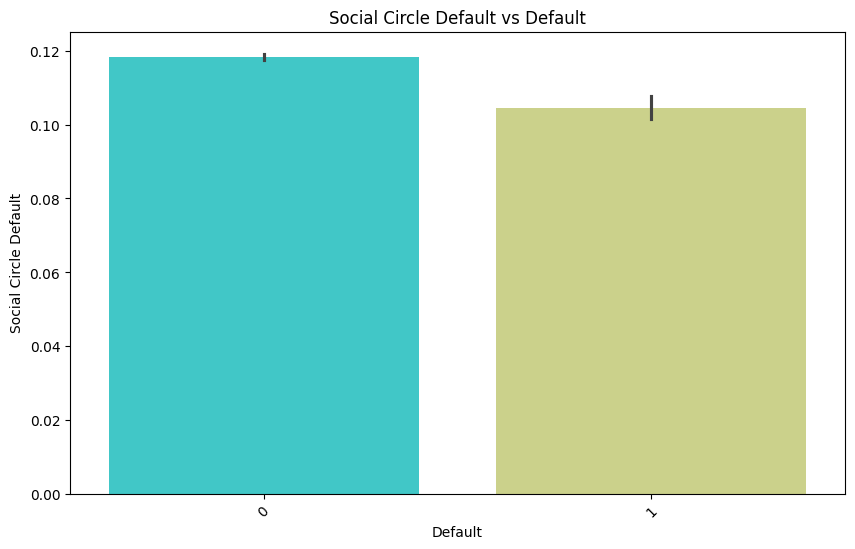

In [592]:
# Social_Circle_Default (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
social_circle_default_numeric = pd.to_numeric(df['Social_Circle_Default'], errors='coerce')
sns.barplot(x='Default', y=social_circle_default_numeric, data=df, palette='rainbow')
plt.title('Social Circle Default vs Default')
plt.xlabel('Default')
plt.ylabel('Social Circle Default')
plt.xticks(rotation=45)
plt.show()


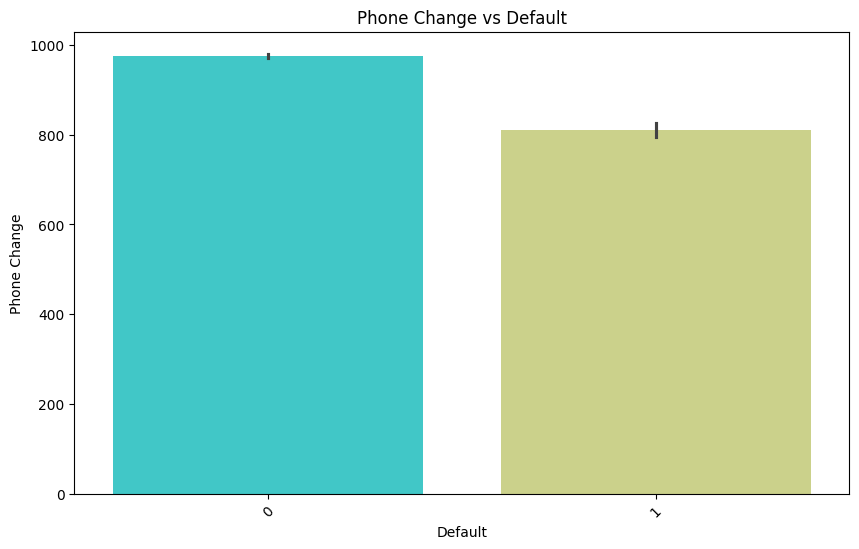

In [593]:
# Phone_Change (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
phone_change_numeric = pd.to_numeric(df['Phone_Change'], errors='coerce')
sns.barplot(x='Default', y=phone_change_numeric, data=df, palette='rainbow')
plt.title('Phone Change vs Default')
plt.xlabel('Default')
plt.ylabel('Phone Change')
plt.xticks(rotation=45)
plt.show()


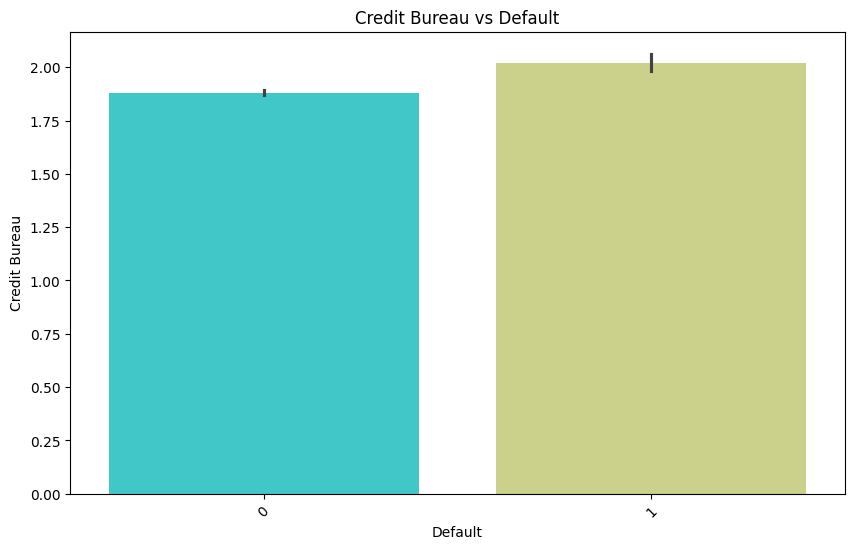

In [594]:
# Credit_Bureau (numeric) vs Default (categorical) analysis bivariate analysis
plt.figure(figsize=(10, 6))
credit_bureau_numeric = pd.to_numeric(df['Credit_Bureau'], errors='coerce')
sns.barplot(x='Default', y=credit_bureau_numeric, data=df, palette='rainbow')
plt.title('Credit Bureau vs Default')
plt.xlabel('Default')
plt.ylabel('Credit Bureau')
plt.xticks(rotation=45)
plt.show()

### Outlier Detection

In [595]:
# outlier analysis for numeric columns
def plot_outliers(data, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column], color='lightblue')
    plt.axvline(data[column].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(data[column].median(), color='blue', linestyle='--', label='Median')
    plt.axvline(data[column].quantile(0.75) + 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25)), color='green', linestyle='--', label='Upper Bound')
    plt.axvline(data[column].quantile(0.25) - 1.5 * (data[column].quantile(0.75) - data[column].quantile(0.25)), color='orange', linestyle='--', label='Lower Bound')
    plt.legend()
    plt.grid(axis='x')
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.ylabel('Value')
    plt.xlabel('Outliers in ' + column)
    plt.grid(True)
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


def create_outlier_plots(data, numeric_columns = None):
    # List of numeric columns to analyze for outliers
    numeric_columns = numeric_columns or [
        'Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Employed_Days',
        'Registration_Days', 'Own_House_Age', 'Score_Source_1', 'Score_Source_2',
        'Score_Source_3', 'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau'
    ]

    # Plotting outliers for each numeric column
    for column in numeric_columns:
        if df[column].dtype in ['float64', 'object']:
            df[column] = pd.to_numeric(df[column], errors='coerce')
        plot_outliers(df, column) 
    # Correlation matrix for numeric columns
    correlation_matrix = df[numeric_columns].corr()
    # Plotting the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix of Numeric Columns')
    plt.show()

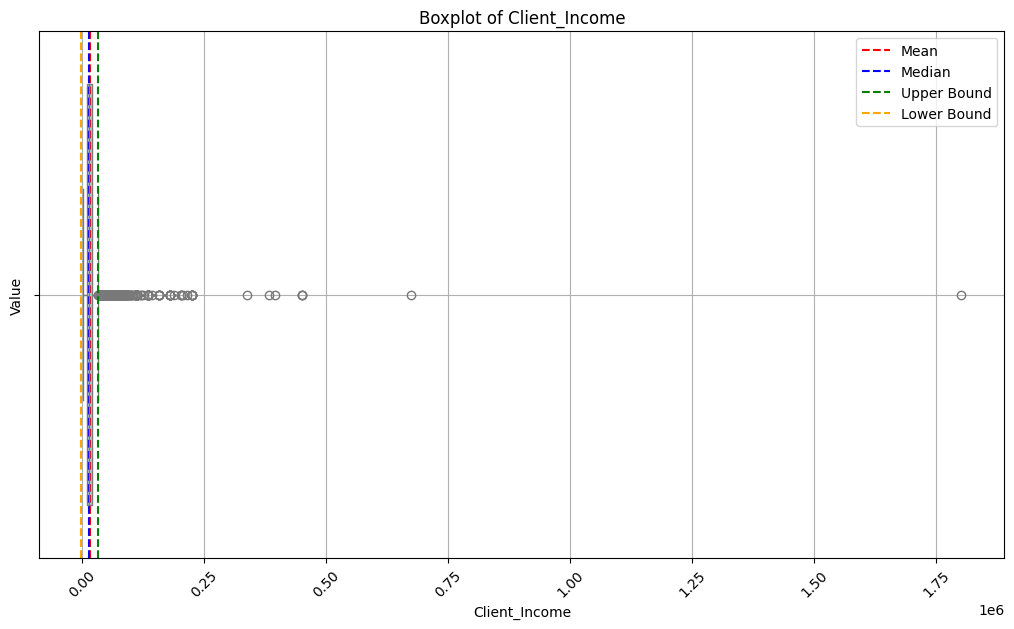

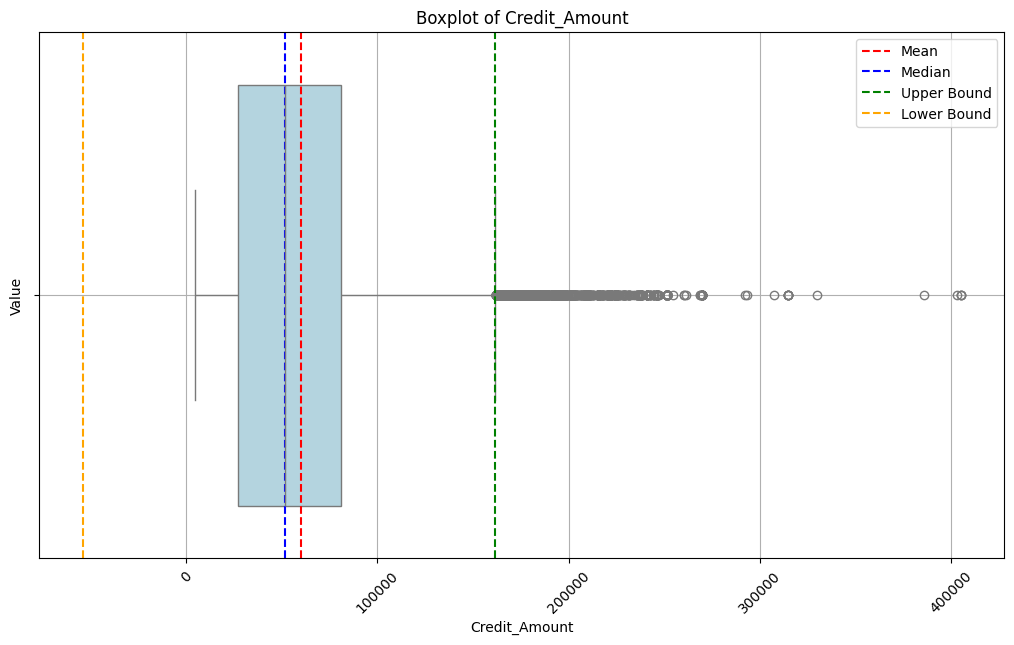

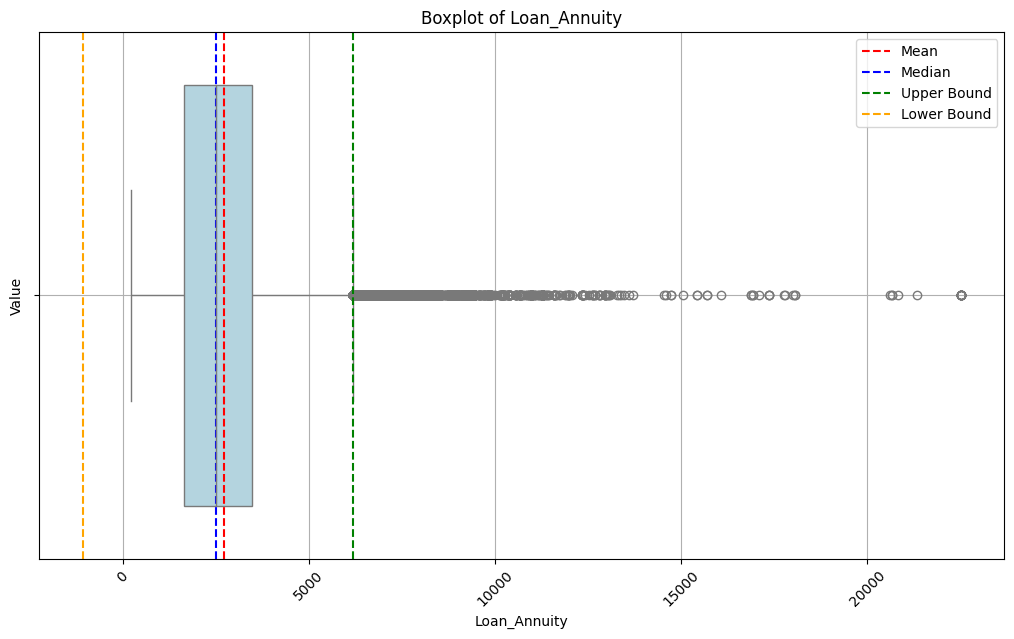

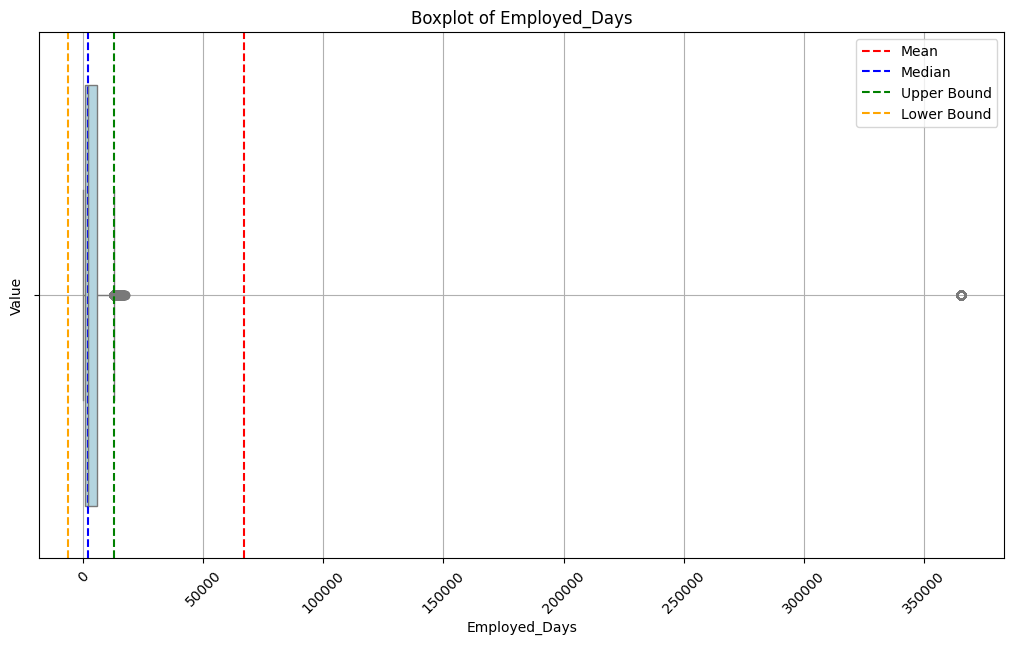

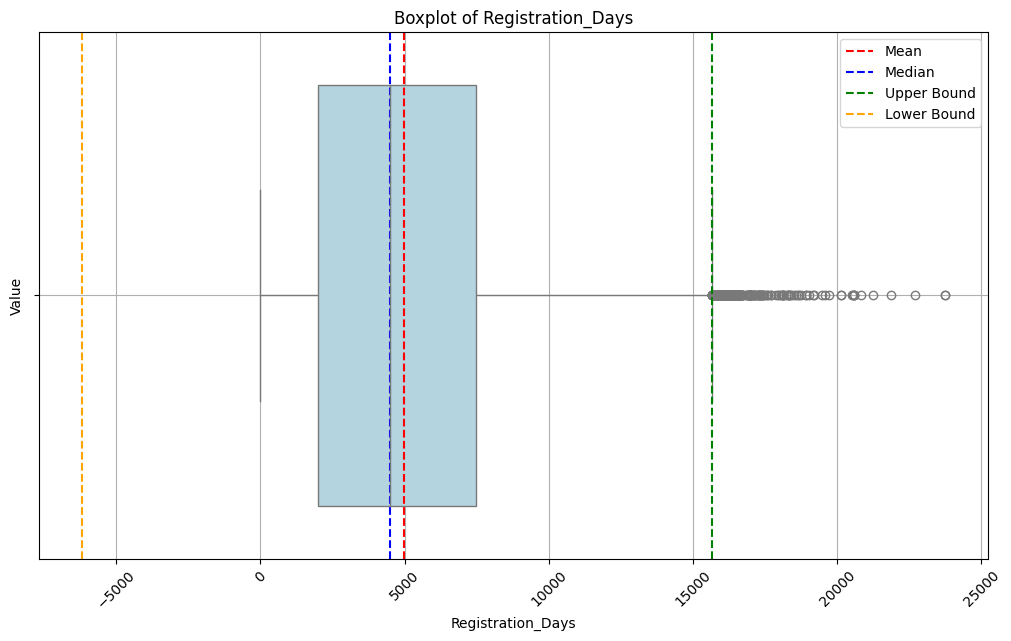

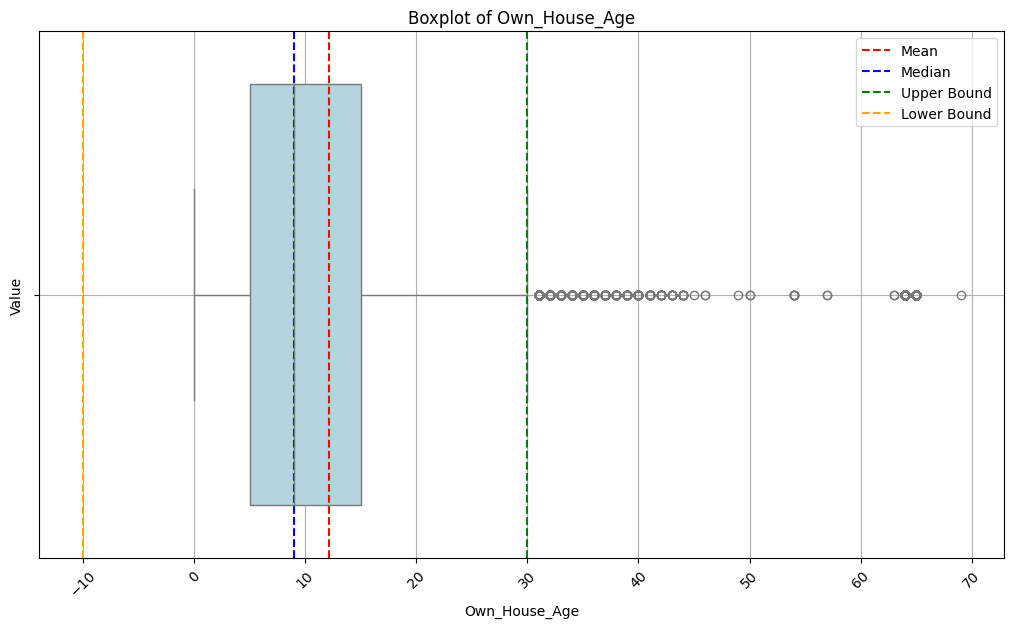

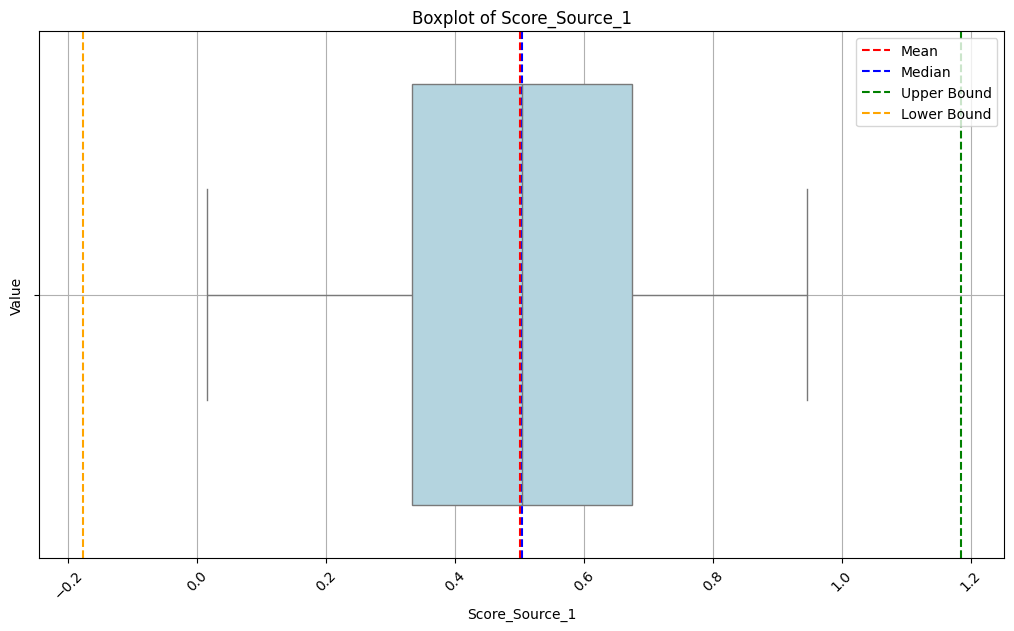

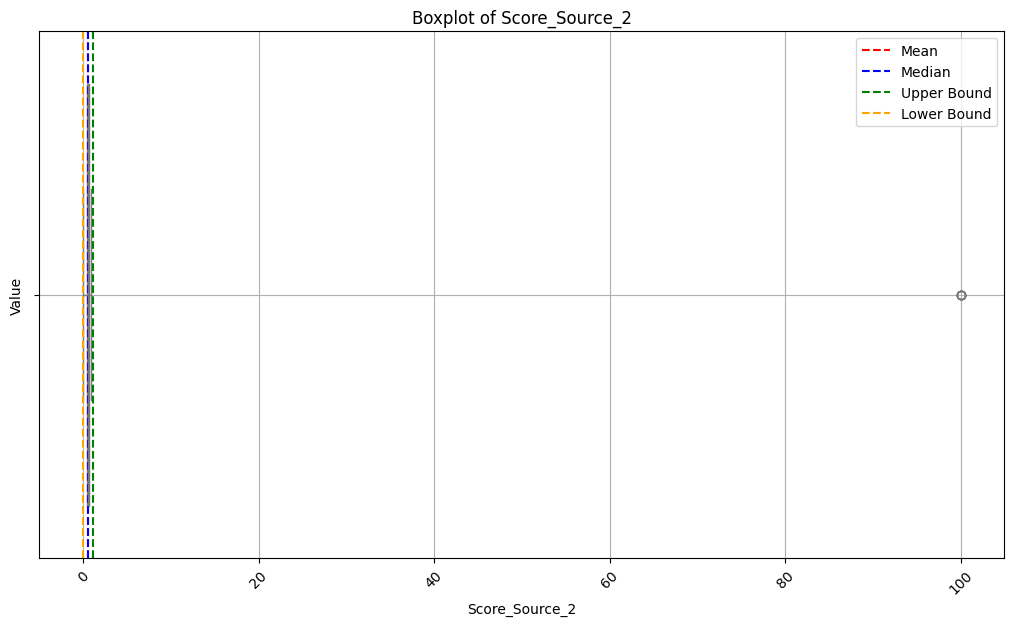

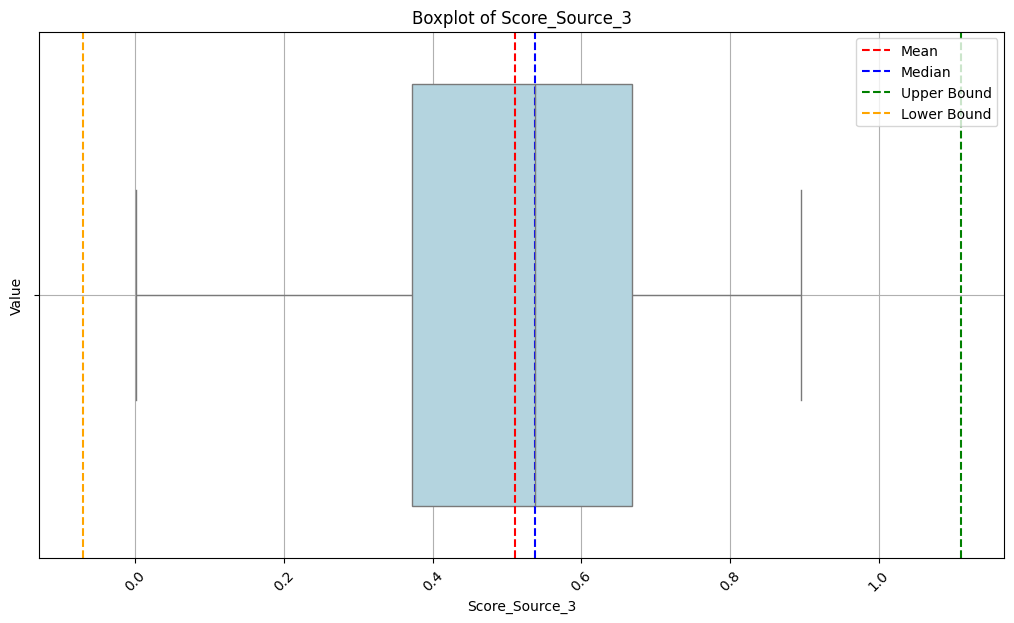

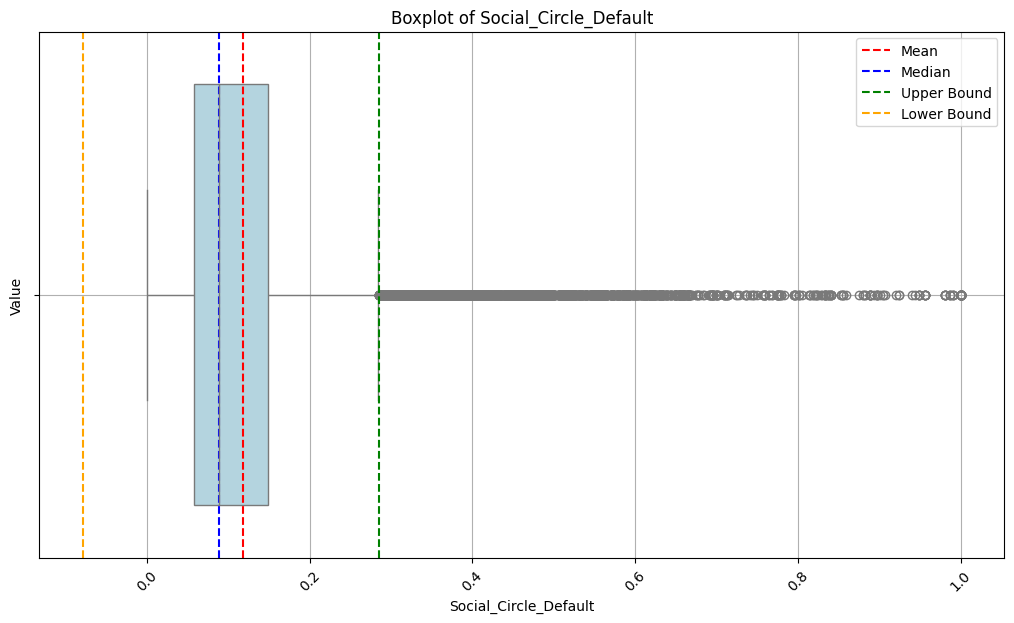

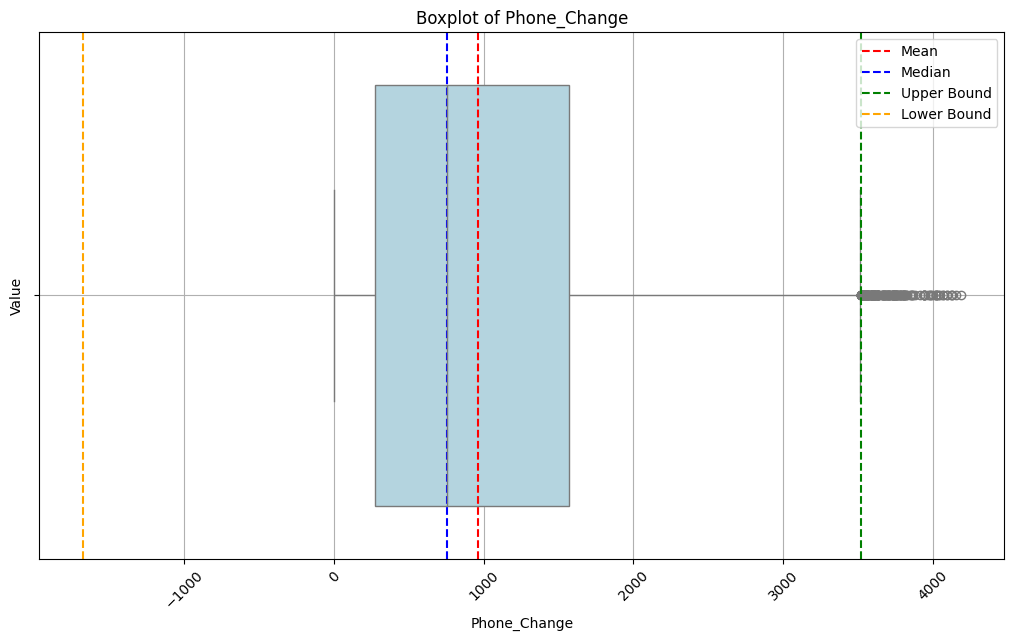

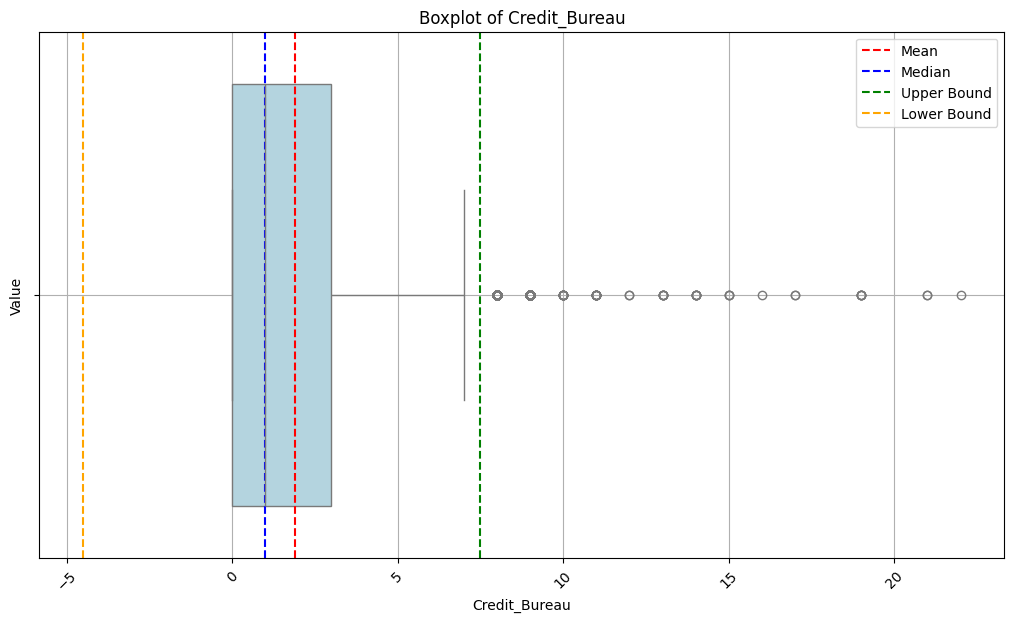

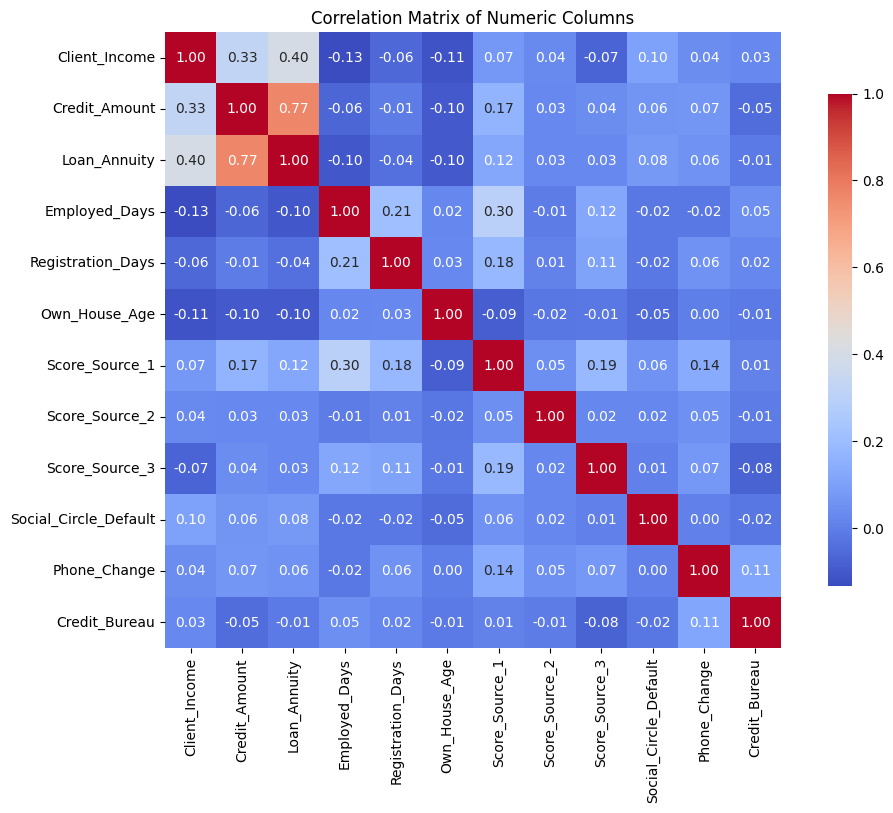

In [596]:
create_outlier_plots(df)

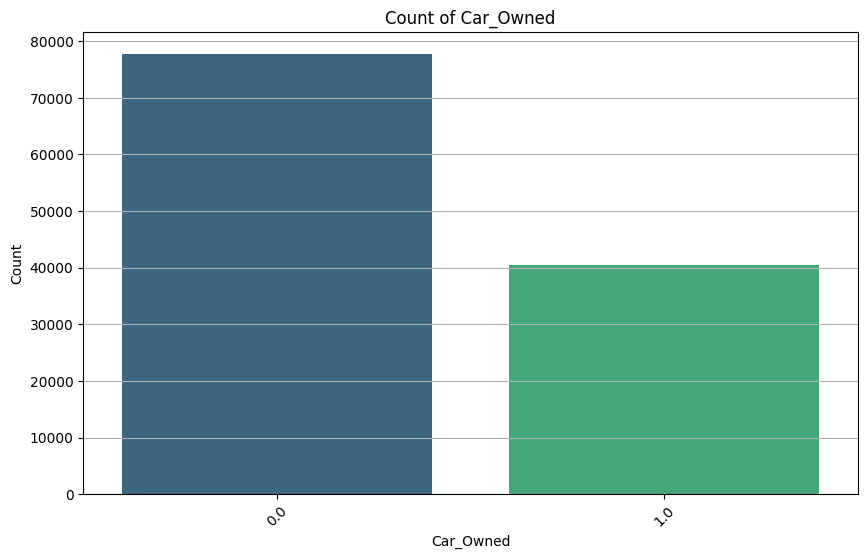

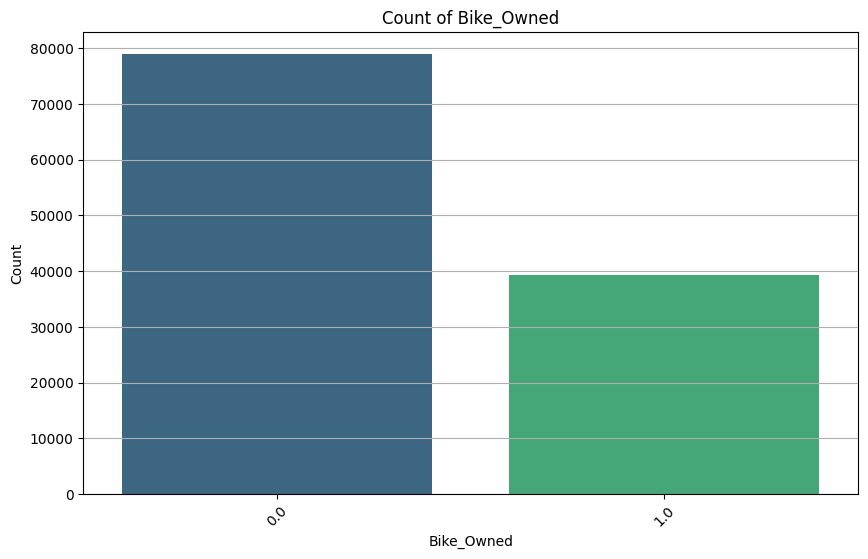

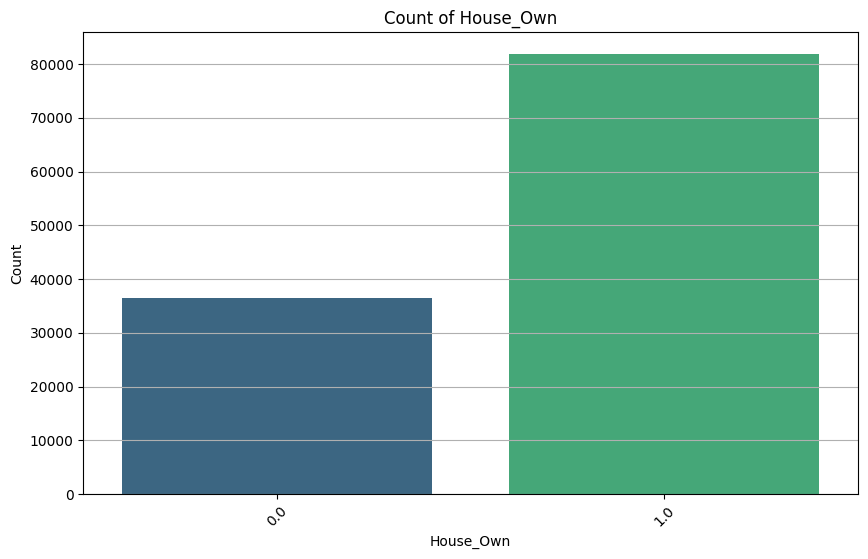

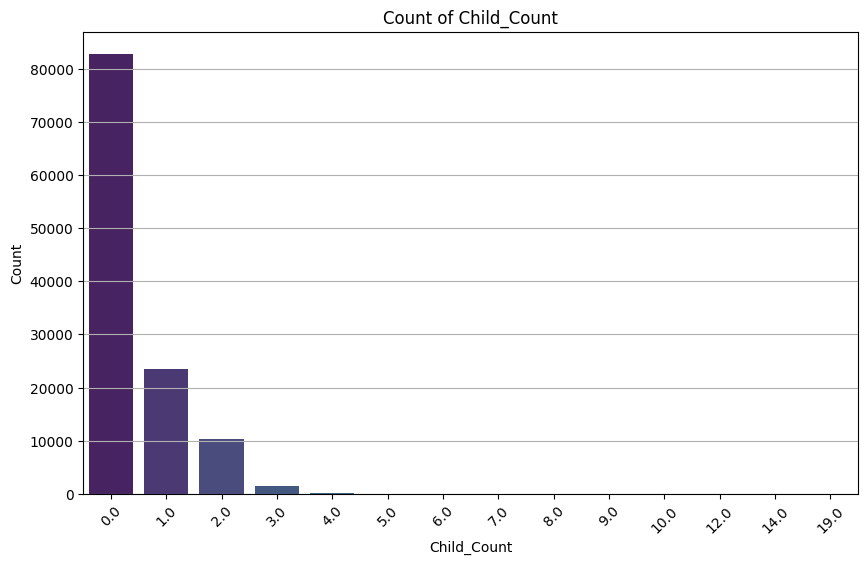

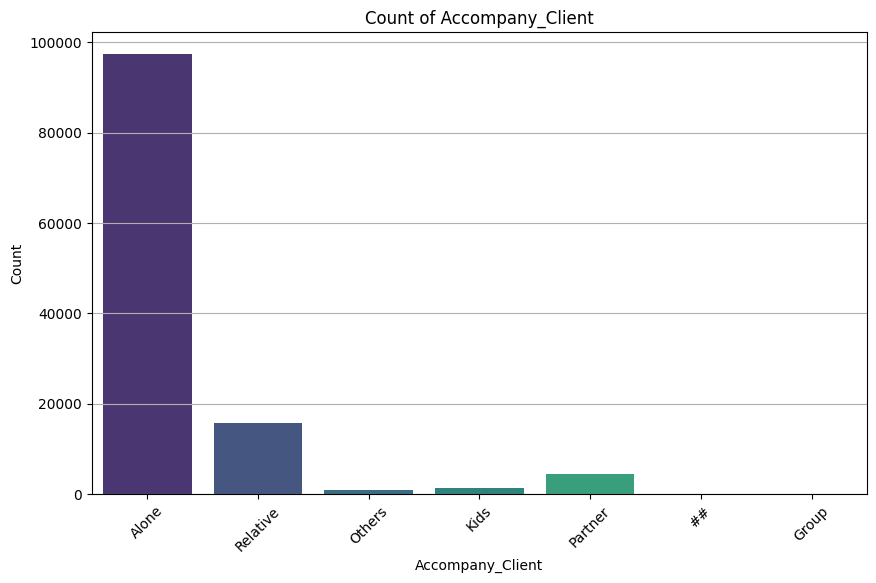

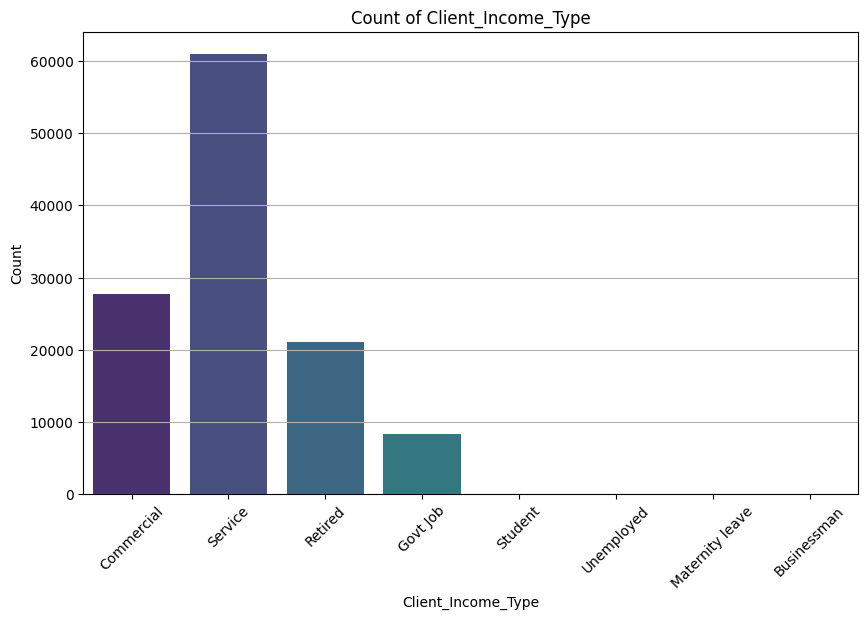

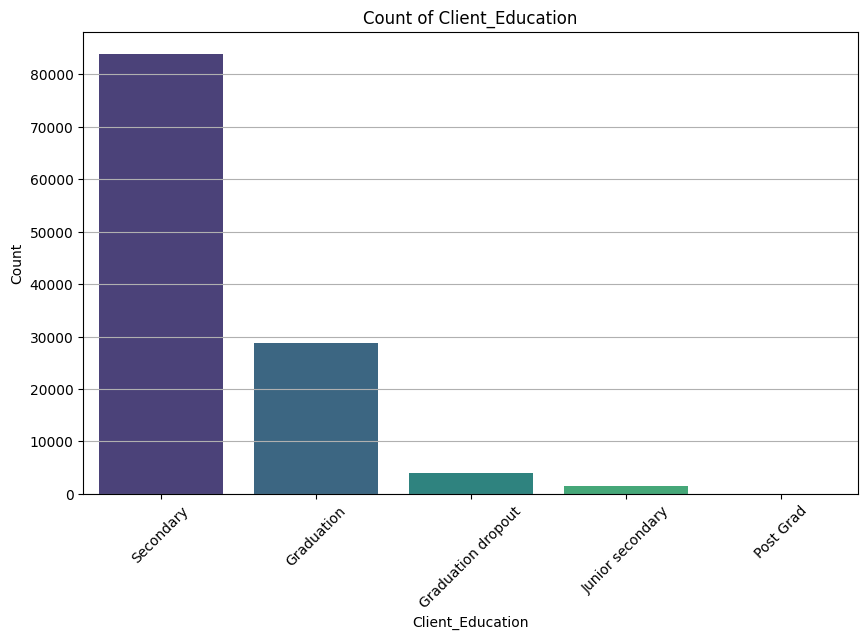

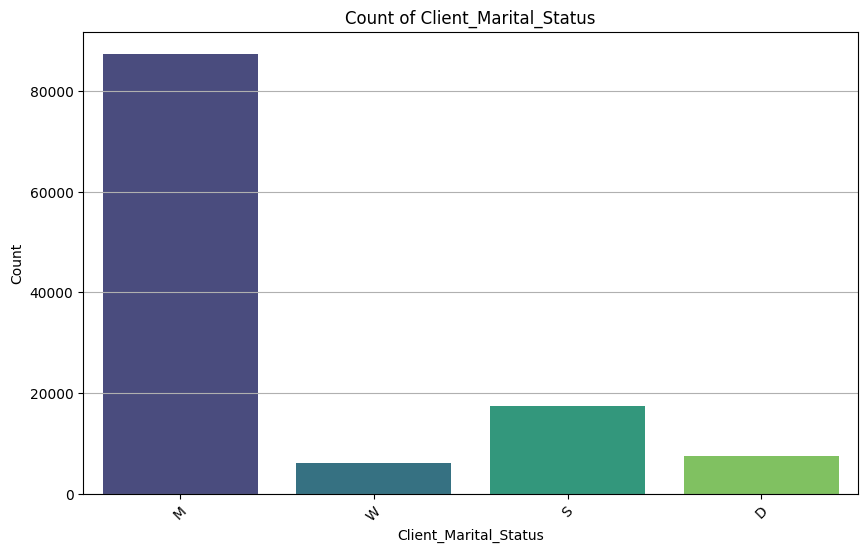

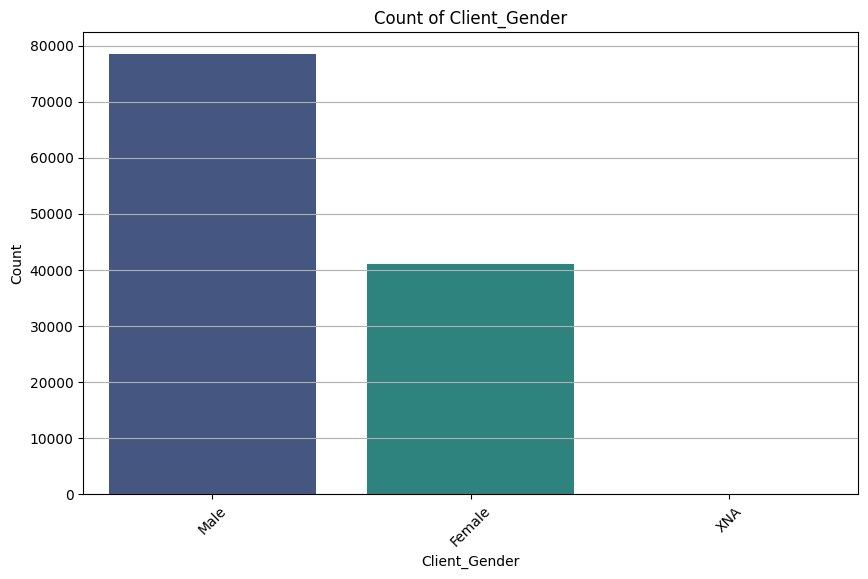

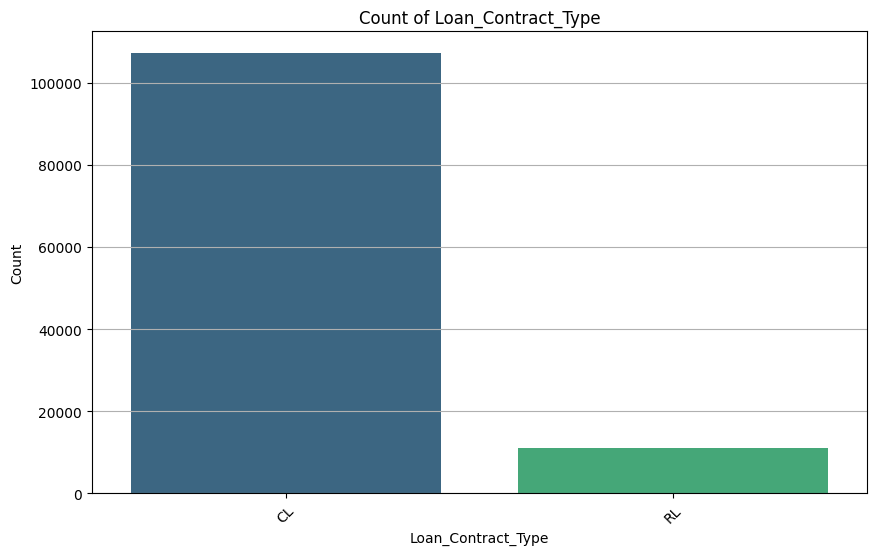

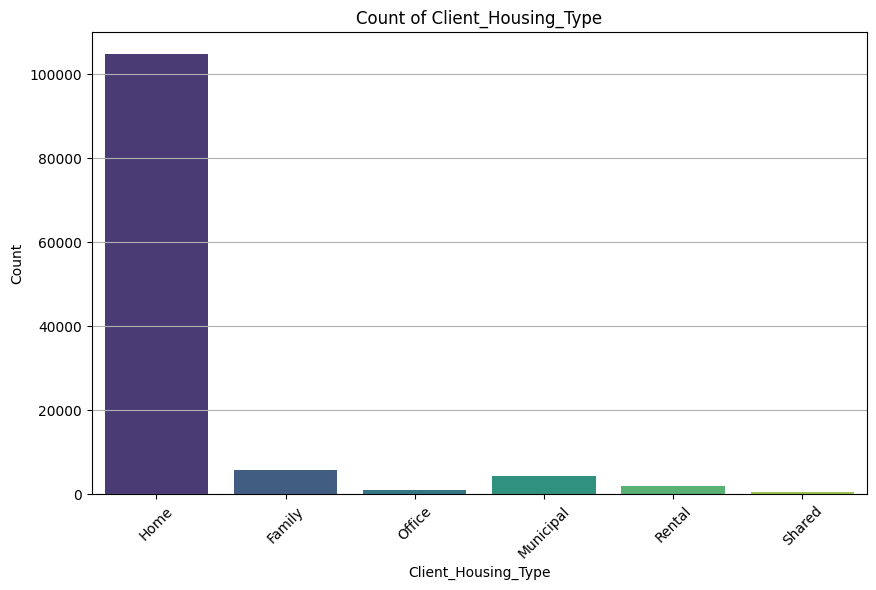

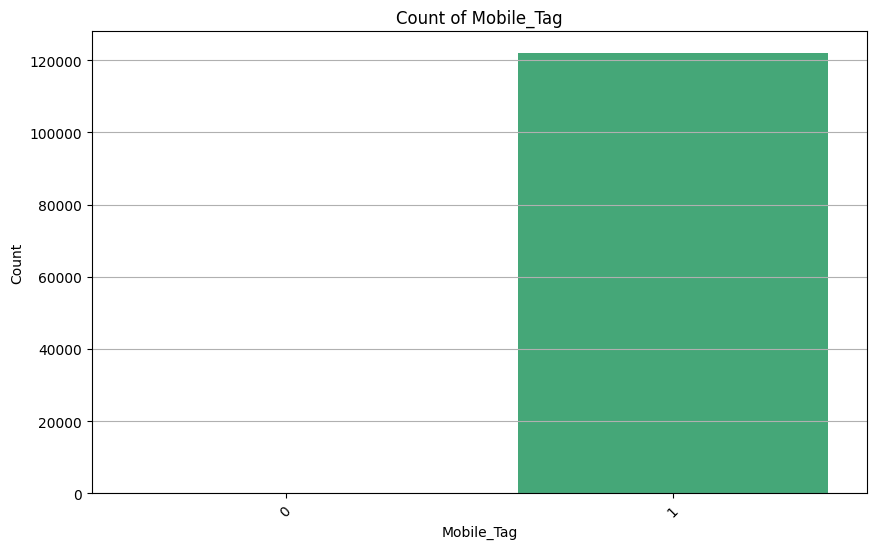

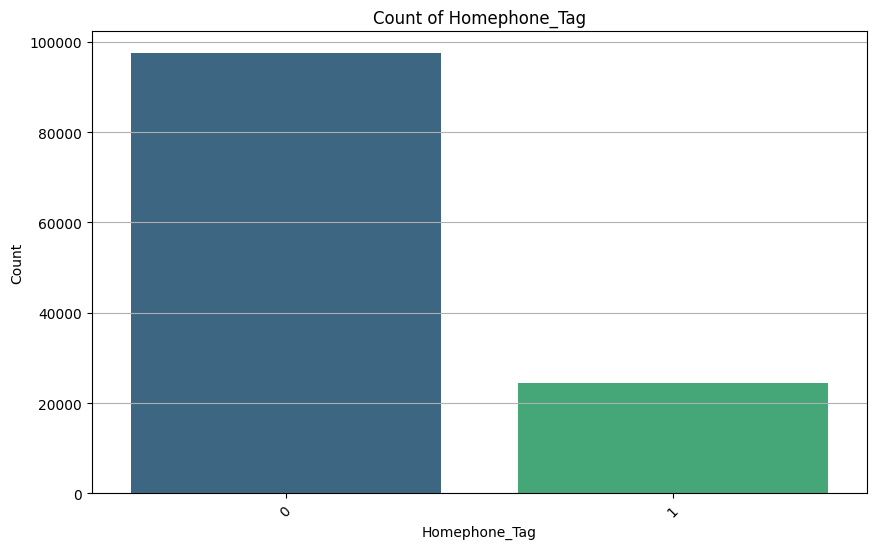

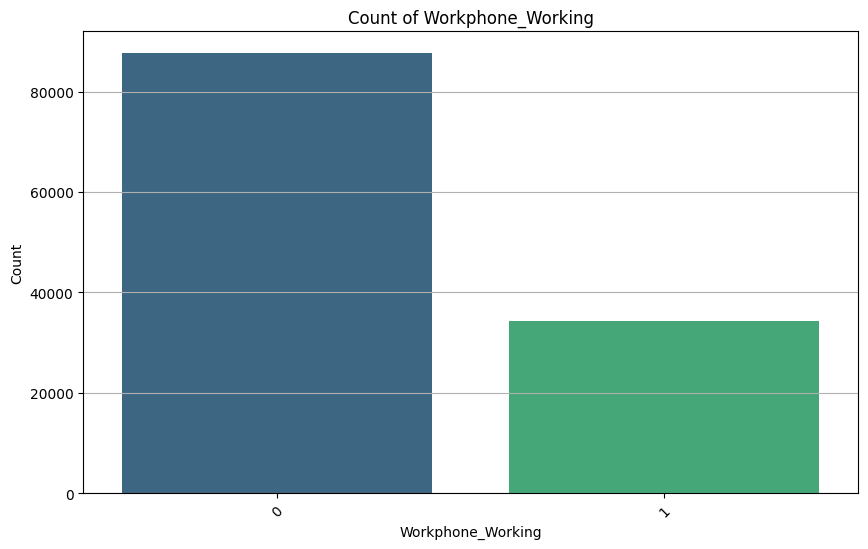

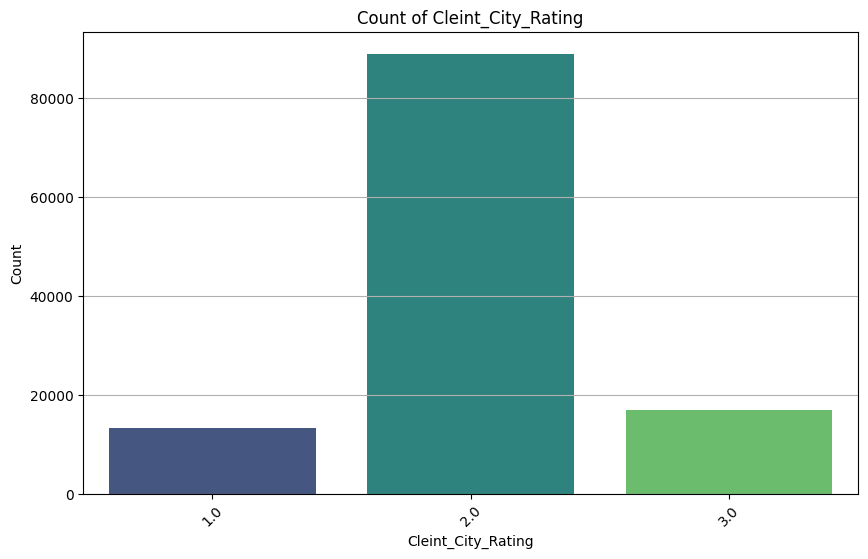

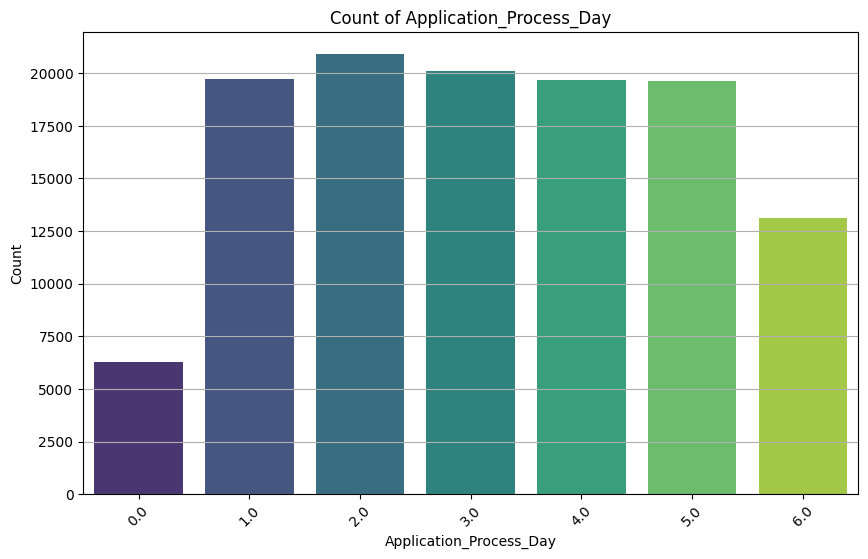

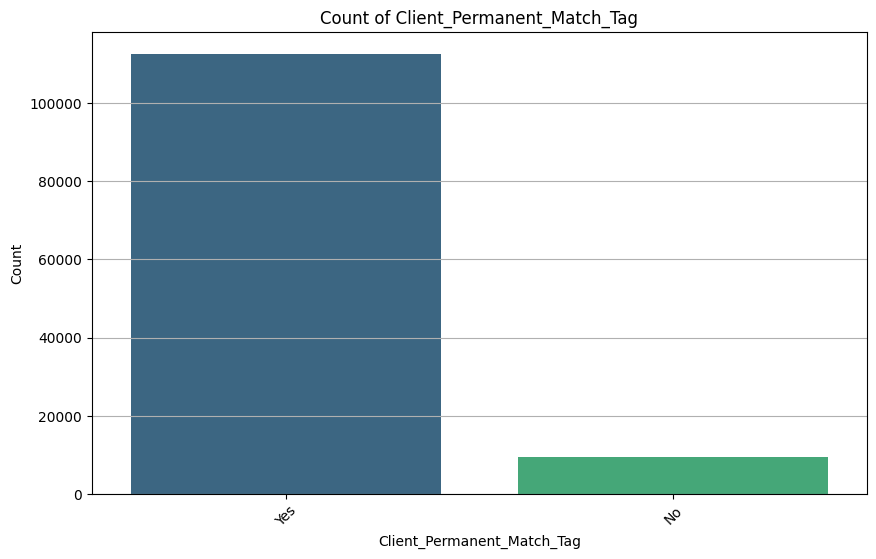

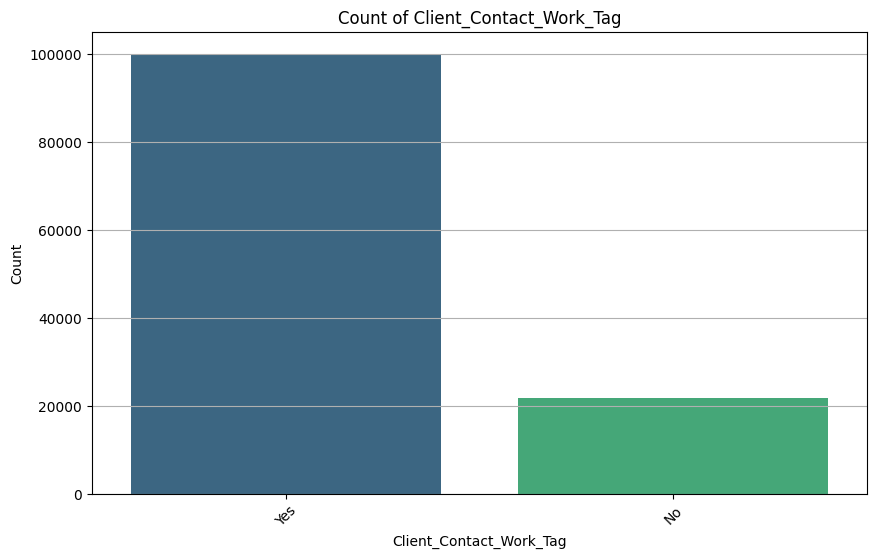

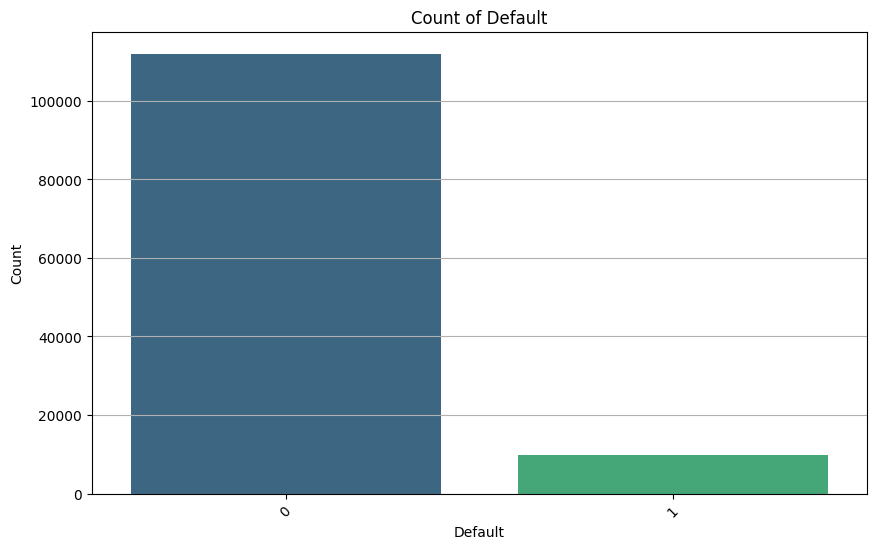

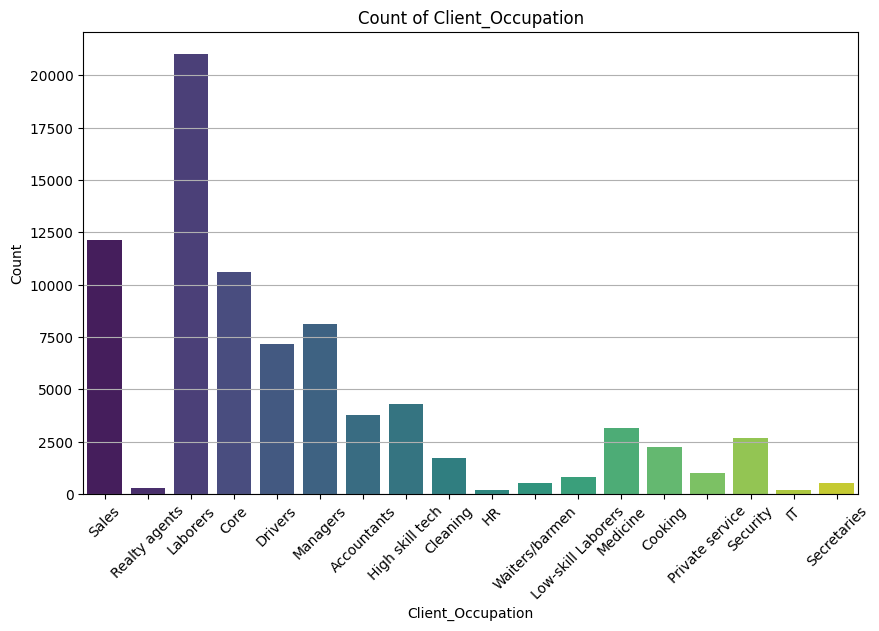

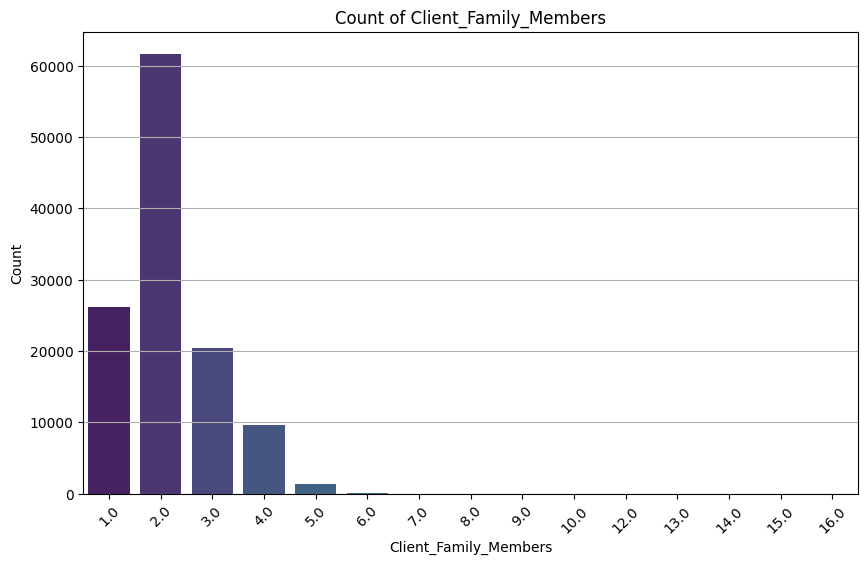

In [597]:
# Outlier analysis for categorical columns
def plot_categorical_outliers(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()
def create_categorical_outlier_plots(data, categorical_columns=None):
    # List of categorical columns to analyze for outliers
    categorical_columns = categorical_columns or [
        'Car_Owned', 'Bike_Owned', 'House_Own', 'Child_Count', 'Accompany_Client',
        'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
        'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
        'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Cleint_City_Rating',
        'Application_Process_Day', 'Client_Permanent_Match_Tag',
        'Client_Contact_Work_Tag', 'Default', 'Client_Occupation',
        'Client_Family_Members'
    ]
    # Plotting outliers for each categorical column
    for column in categorical_columns:
        plot_categorical_outliers(data, column)
        
create_categorical_outlier_plots(df)

## Data Manipulation
1. Drop Duplicates (if any)
2. Fill the missing Values
3. Correct the data types
4. Fix the spelling errors in variables

In [598]:
print(df.shape)
df.drop_duplicates()

(121856, 40)


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250.0,0.0,0.0,NaN,1.0,0.0,107820.00,3165.30,Relative,...,Yes,No,Business Entity Type 2,NaN,0.173527,0.184116,0.0577,0.0,1.0,1
121852,12173765,15750.0,0.0,1.0,1.0,0.0,0.0,104256.00,3388.05,Alone,...,Yes,Yes,Self-employed,NaN,0.371559,0.406617,0.0825,4.0,0.0,0
121853,12103937,8100.0,0.0,1.0,0.0,1.0,1.0,55107.90,2989.35,Alone,...,No,No,Trade: type 6,0.169049,0.048079,NaN,NaN,0.0,NaN,0
121854,12170623,38250.0,1.0,1.0,0.0,1.0,0.0,45000.00,2719.35,Alone,...,Yes,Yes,Business Entity Type 3,0.182737,0.103538,0.077499,0.0979,0.0,2.0,0


In [599]:
# Dropping columns with high null values
df.dropna(axis=0,how='any')

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
102,12127046,27000.0,1.0,0.0,0.0,1.0,3.0,53366.85,4003.20,Alone,...,Yes,Yes,Business Entity Type 3,0.477169,0.677447,0.581484,0.0330,1805.0,4.0,0
126,12210150,18000.0,1.0,0.0,1.0,1.0,1.0,27000.00,724.95,Alone,...,Yes,Yes,Transport: type 4,0.741930,0.642445,0.397946,0.1010,2268.0,0.0,0
161,12170397,18000.0,1.0,1.0,1.0,1.0,0.0,48149.55,3351.15,Alone,...,Yes,Yes,Self-employed,0.135435,0.470134,0.236611,0.0021,1753.0,7.0,0
189,12159662,15750.0,1.0,1.0,0.0,1.0,0.0,57340.80,2072.70,Alone,...,Yes,No,Construction,0.288840,0.272040,0.684828,0.0412,1198.0,3.0,0
190,12178498,18000.0,1.0,1.0,0.0,1.0,0.0,27370.80,3095.55,Alone,...,Yes,Yes,Transport: type 2,0.245756,0.295019,0.554947,0.1606,922.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121684,12102935,9000.0,1.0,0.0,0.0,0.0,1.0,32590.80,1663.65,Alone,...,Yes,Yes,Business Entity Type 3,0.527100,0.510524,0.681706,0.0082,2634.0,3.0,0
121771,12128897,16650.0,1.0,0.0,0.0,1.0,0.0,51244.65,3741.75,Alone,...,Yes,Yes,Postal,0.328439,0.677394,0.759712,0.0876,1420.0,7.0,0
121777,12124129,9900.0,1.0,1.0,1.0,1.0,1.0,76022.55,3028.05,Alone,...,Yes,Yes,Business Entity Type 3,0.634176,0.426885,0.770087,0.2278,0.0,1.0,0
121838,12164225,31500.0,1.0,0.0,0.0,1.0,1.0,94230.00,2767.95,Alone,...,Yes,Yes,Military,0.306227,0.671083,0.450747,0.0825,1796.0,5.0,0


- 2568 rows remained therefore, we can't drop the rows which contains null values.

In [600]:
df.shape

(121856, 40)

In [601]:
def to_numeric(data, column):
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Converting columns to numeric
columns_to_convert = [
    'Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Employed_Days',
    'Registration_Days', 'Own_House_Age', 'Score_Source_1', 'Score_Source_2',
    'Score_Source_3', 'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau',
    'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days',
    'ID_Days'
]

for column in columns_to_convert:
    to_numeric(df, column)

In [602]:
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750.0,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250.0,1.0,0.0,1.0,NaN,0.0,15282.00,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000.0,0.0,0.0,1.0,0.0,1.0,59527.35,2788.20,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750.0,0.0,0.0,1.0,1.0,0.0,53870.40,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750.0,1.0,0.0,1.0,0.0,2.0,133988.40,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [603]:
# Replacing NaN values in Car_Owned, Bike_Owned, House_Own, Child_Count, Accompany_Client, Client_Income_Type, Client_Education, Client_Marital_Status, Client_Gender columns with 0

def fill_na(data, column, value=0):
    data[column] = data[column].fillna(value)
    return data

fill_hash_map = {
    'Client_Income': 0,
    'Loan_Annuity': 0,
    'Car_Owned': 0.0,
    'Bike_Owned': 0.0,
    'House_Own': 0.0,
    'Child_Count': 0.0,
    'Accompany_Client': 'Alone',
    'Client_Gender': 'XNA',
    'Employed_Days': 0.0,
    'Score_Source_1': 0.0,
    'Score_Source_2': 0.0,
    'Score_Source_3': 0.0,
    'Client_Family_Members': 0.0,
    'Social_Circle_Default': 0.0,
    'Client_Permanent_Match_Tag': 'No',
    'Client_Contact_Work_Tag': 'No',
    'Phone_Change': df['Phone_Change'].mode()[0],
    'Credit_Bureau': df['Credit_Bureau'].mode()[0],
    'Own_House_Age': 0.0,
    'Active_Loan': 0.0,
    'Client_Occupation': 'Unknown',
    'Population_Region_Relative': 0.0
}

for column, value in fill_hash_map.items():
    df = fill_na(df, column, value)


In [604]:
# Combining Mobile_Tag, Homephone_Tag, Workphone_Working categories into a single column 'Contact_Tag'
def combine_contact_tags(data):
    data['Contact_Tag'] = data['Homephone_Tag'] | data['Mobile_Tag'] | data['Workphone_Working']
    data['Contact_Tag'] = data['Contact_Tag'].replace({True: 1.0, False: 0.0})
    return data
df = combine_contact_tags(df)


In [605]:
df['Client_Contact_Work_Tag'].head()

0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Client_Contact_Work_Tag, dtype: object

In [606]:
# Normlizing the 'Score_Source_1', 'Score_Source_2', 'Score_Source_3' columns with 0 to 1 range
def normalize_scores(data, columns):
    for column in columns:
        data[column] = pd.to_numeric(data[column], errors='coerce')
        min_val = data[column].min()
        max_val = data[column].max()
        data[column] = (data[column] - min_val) / (max_val - min_val)
    return data
df = normalize_scores(df, ['Score_Source_1', 'Score_Source_2', 'Score_Source_3'])

In [607]:
df.dropna(inplace=True)

In [608]:
# Converting categorical columns to numerical values
def convert_categorical_to_numerical(data, columns):
    for column in columns:
        data[column] = data[column].astype('category').cat.codes
    return data
categorical_columns = [
    'Car_Owned', 'Bike_Owned', 'House_Own', 'Child_Count', 'Accompany_Client',
    'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
    'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
    'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Cleint_City_Rating',
    'Application_Process_Day', 'Client_Permanent_Match_Tag',
    'Client_Contact_Work_Tag', 'Default', 'Client_Occupation',
    'Client_Family_Members', 'Contact_Tag', 'Type_Organization',
]
convert_categorical_to_numerical(df, categorical_columns)

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default,Contact_Tag
0,12142509,6750.0,0,0,1.0,0,0,61190.55,3416.85,1,...,1,42,0.600657,0.004788,0.000000,0.0186,63.0,0.0,0,1
1,12138936,20250.0,1,0,1.0,0,0,15282.00,1826.55,1,...,1,11,0.595681,0.002151,0.000000,0.0000,0.0,0.0,0,1
5,12191614,11250.0,0,1,1.0,1,1,13752.00,653.85,1,...,1,33,0.000000,0.006979,0.469427,0.0639,739.0,0.0,0,1
6,12128086,15750.0,1,1,0.0,1,0,128835.00,3779.55,1,...,1,57,0.771790,0.006025,0.571302,0.2041,0.0,3.0,0,1
7,12215264,13500.0,0,0,1.0,1,0,60415.20,3097.80,1,...,1,57,0.752286,0.006575,0.613382,0.0000,1687.0,4.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121851,12207714,29250.0,0,0,0.0,1,0,107820.00,3165.30,6,...,0,4,0.000000,0.001735,0.205485,0.0577,0.0,1.0,1,1
121852,12173765,15750.0,0,1,1.0,0,0,104256.00,3388.05,1,...,1,42,0.000000,0.003716,0.453809,0.0825,4.0,0.0,0,1
121853,12103937,8100.0,0,1,0.0,1,1,55107.90,2989.35,1,...,0,50,0.178748,0.000481,0.000000,0.0000,0.0,0.0,0,1
121854,12170623,38250.0,1,1,0.0,1,0,45000.00,2719.35,1,...,1,5,0.193221,0.001035,0.086493,0.0979,0.0,2.0,0,1


In [609]:
gen_temp_eda(df)

,null_values,unique_values,data_types
ID,0,82347,int64
Client_Income,0,1004,float64
Car_Owned,0,2,int8
Bike_Owned,0,2,int8
Active_Loan,0,2,float64
House_Own,0,2,int8
Child_Count,0,13,int8
Credit_Amount,0,3829,float64
Loan_Annuity,0,9902,float64
Accompany_Client,0,7,int8


In [610]:
# Saving the cleaned and processed DataFrame to a new CSV file
df.to_csv('data/cleaned_data.csv', index=False)

## Model Training

In [611]:
df = pd.read_csv('data/cleaned_data.csv')

In [612]:
# train test split
from sklearn.model_selection import train_test_split
X = df.drop(['Default', 'ID'], axis=1)
y = df['Default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [613]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [614]:
# Logistic Regression, Random Forest, and XGBoost models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Training the models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_scaled, y_train) 

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [615]:
# saving models
import joblib
joblib.dump(logistic_model, 'models/logistic_model.pkl')
joblib.dump(rf_model, 'models/rf_model.pkl')
joblib.dump(xgb_model, 'models/xgb_model.pkl')

['models/xgb_model.pkl']

In [616]:
# loading models
logistic_model = joblib.load('models/logistic_model.pkl')
rf_model = joblib.load('models/rf_model.pkl')
xgb_model = joblib.load('models/xgb_model.pkl')

In [617]:
# Evaluating the models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Logistic Regression evaluation
logistic_predictions = logistic_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, logistic_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, logistic_predictions))

Logistic Regression Accuracy: 0.9223436551305404
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     15191
           1       0.00      0.00      0.00      1279

    accuracy                           0.92     16470
   macro avg       0.46      0.50      0.48     16470
weighted avg       0.85      0.92      0.89     16470



In [618]:
# Random Forest evaluation
rf_predictions = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.9301760777170613
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     15191
           1       1.00      0.10      0.18      1279

    accuracy                           0.93     16470
   macro avg       0.96      0.55      0.57     16470
weighted avg       0.94      0.93      0.90     16470



In [619]:
# XGBoost evaluation
xgb_predictions = xgb_model.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))

XGBoost Accuracy: 0.9217972070431086
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96     15191
           1       0.46      0.04      0.08      1279

    accuracy                           0.92     16470
   macro avg       0.69      0.52      0.52     16470
weighted avg       0.89      0.92      0.89     16470



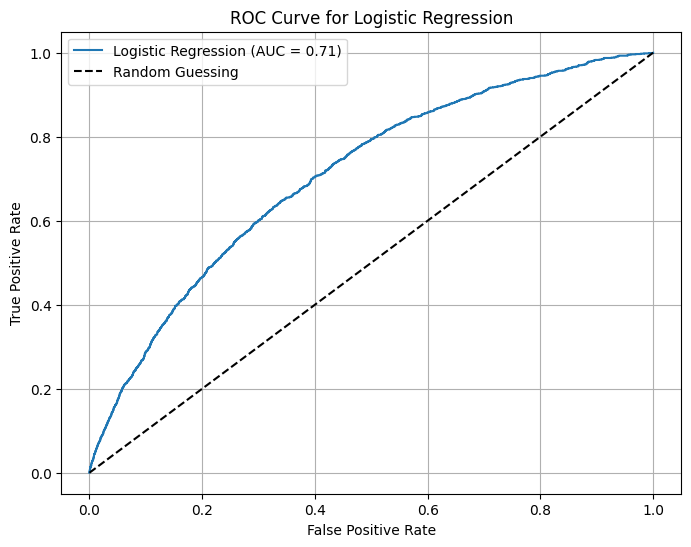

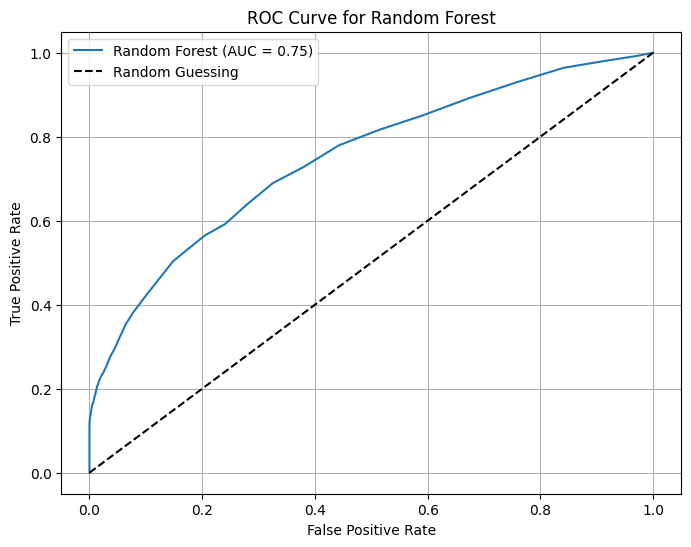

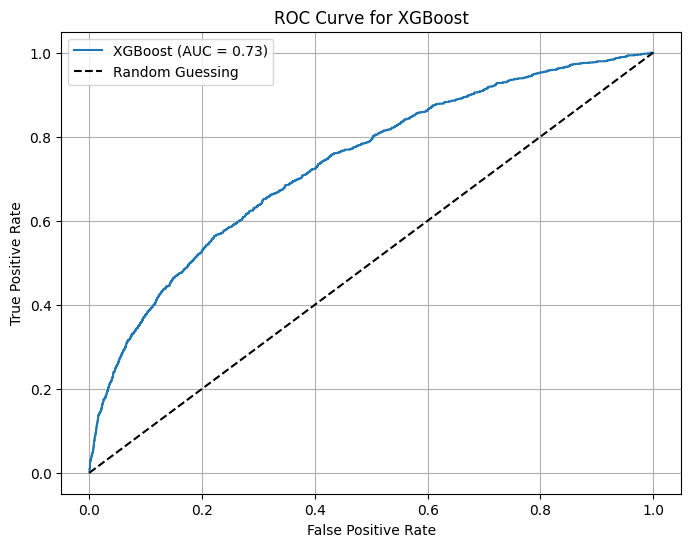

In [620]:
# AOC and ROC Curve for each model
from sklearn.metrics import roc_auc_score, roc_curve
def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.title(f'ROC Curve for {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()
plot_roc_curve(logistic_model, X_test_scaled, y_test, 'Logistic Regression')
plot_roc_curve(rf_model, X_test_scaled, y_test, 'Random Forest')
plot_roc_curve(xgb_model, X_test_scaled, y_test, 'XGBoost')

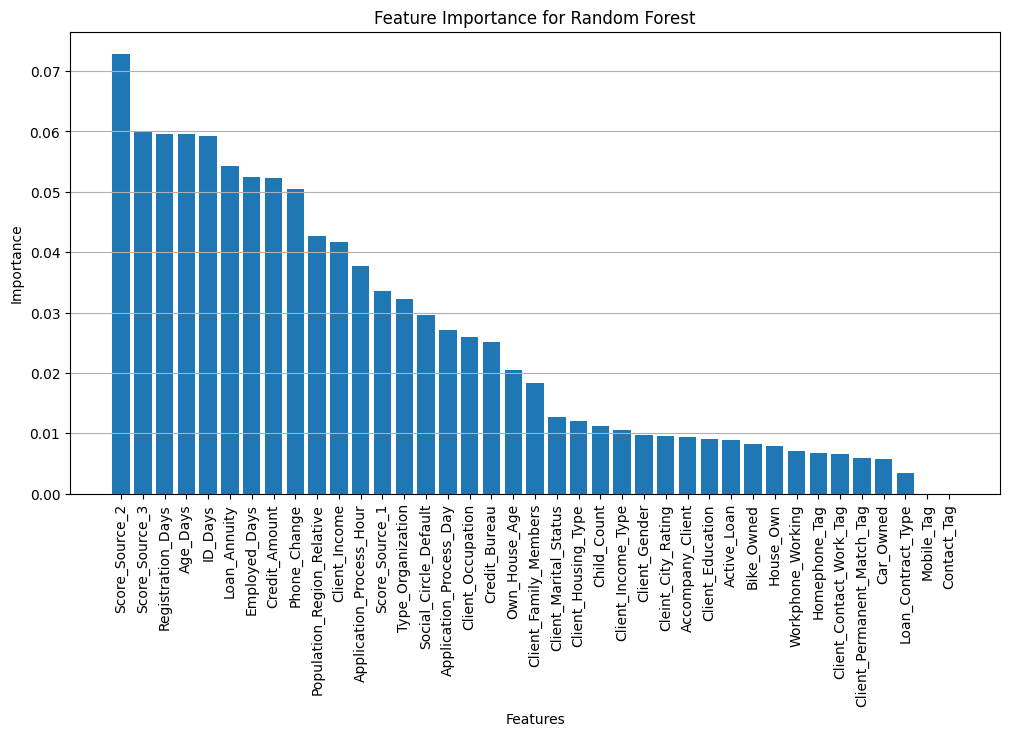

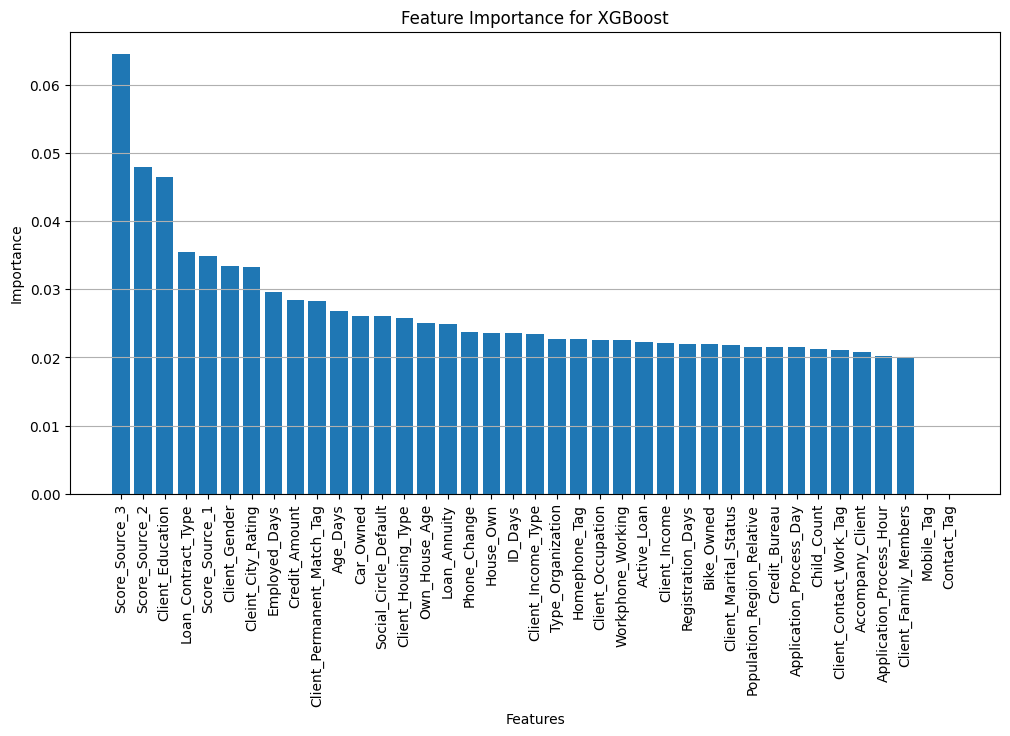

In [623]:
# Feature Importance for Random Forest and XGBoost
def plot_feature_importance(model, X_train, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importance for {model_name}')
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.grid(axis='y')
    plt.show()
plot_feature_importance(rf_model, X_train, 'Random Forest')
plot_feature_importance(xgb_model, X_train, 'XGBoost')

In [624]:
# Saving the evaluation results to a text file
with open('model_evaluation.txt', 'w') as f:
    f.write("Logistic Regression Accuracy: {}\n".format(accuracy_score(y_test, logistic_predictions)))
    f.write("Logistic Regression Classification Report:\n{}\n".format(classification_report(y_test, logistic_predictions)))
    
    f.write("Random Forest Accuracy: {}\n".format(accuracy_score(y_test, rf_predictions)))
    f.write("Random Forest Classification Report:\n{}\n".format(classification_report(y_test, rf_predictions)))
    
    f.write("XGBoost Accuracy: {}\n".format(accuracy_score(y_test, xgb_predictions)))
    f.write("XGBoost Classification Report:\n{}\n".format(classification_report(y_test, xgb_predictions)))

## Conclusion
- The evaluation of the models indicates that all three algorithms (Logistic Regression, Random Forest, and XGBoost) performed well on the loan default prediction task. Each model has its strengths, and the choice of model may depend on the specific requirements of the application, such as interpretability, speed, and accuracy.
- The Logistic Regression model is simple and interpretable, making it suitable for understanding the impact of features on loan default.
- The Random Forest model provides good accuracy and handles non-linear relationships well, while also offering feature importance insights.
- The XGBoost model is known for its high performance and efficiency, especially on large datasets, and it also provides feature importance.
- The feature importance plots for Random Forest and XGBoost highlight the most influential features in predicting loan defaults, which can guide further analysis and business decisions.